Original data shape: (39, 10)
Columns: ['Unnamed: 0', 'Classification', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9']
Data shape after cleaning: (37, 9)
Data preview after cleaning:
                                     Antibiotics Class  \
Antibiotics Class                                        
Aminocoumarin antibiotics                            0   
Aminoglycosides                                      0   
Bicyclomycins                                        0   
Carbapenems, Penams, Cephalosporins                  0   
Cephalosporins                                       0   

                                     antibiotic activation enzyme  \
Antibiotics Class                                                   
Aminocoumarin antibiotics                                       0   
Aminoglycosides                                                56   
Bicyclomycins                                                   0   


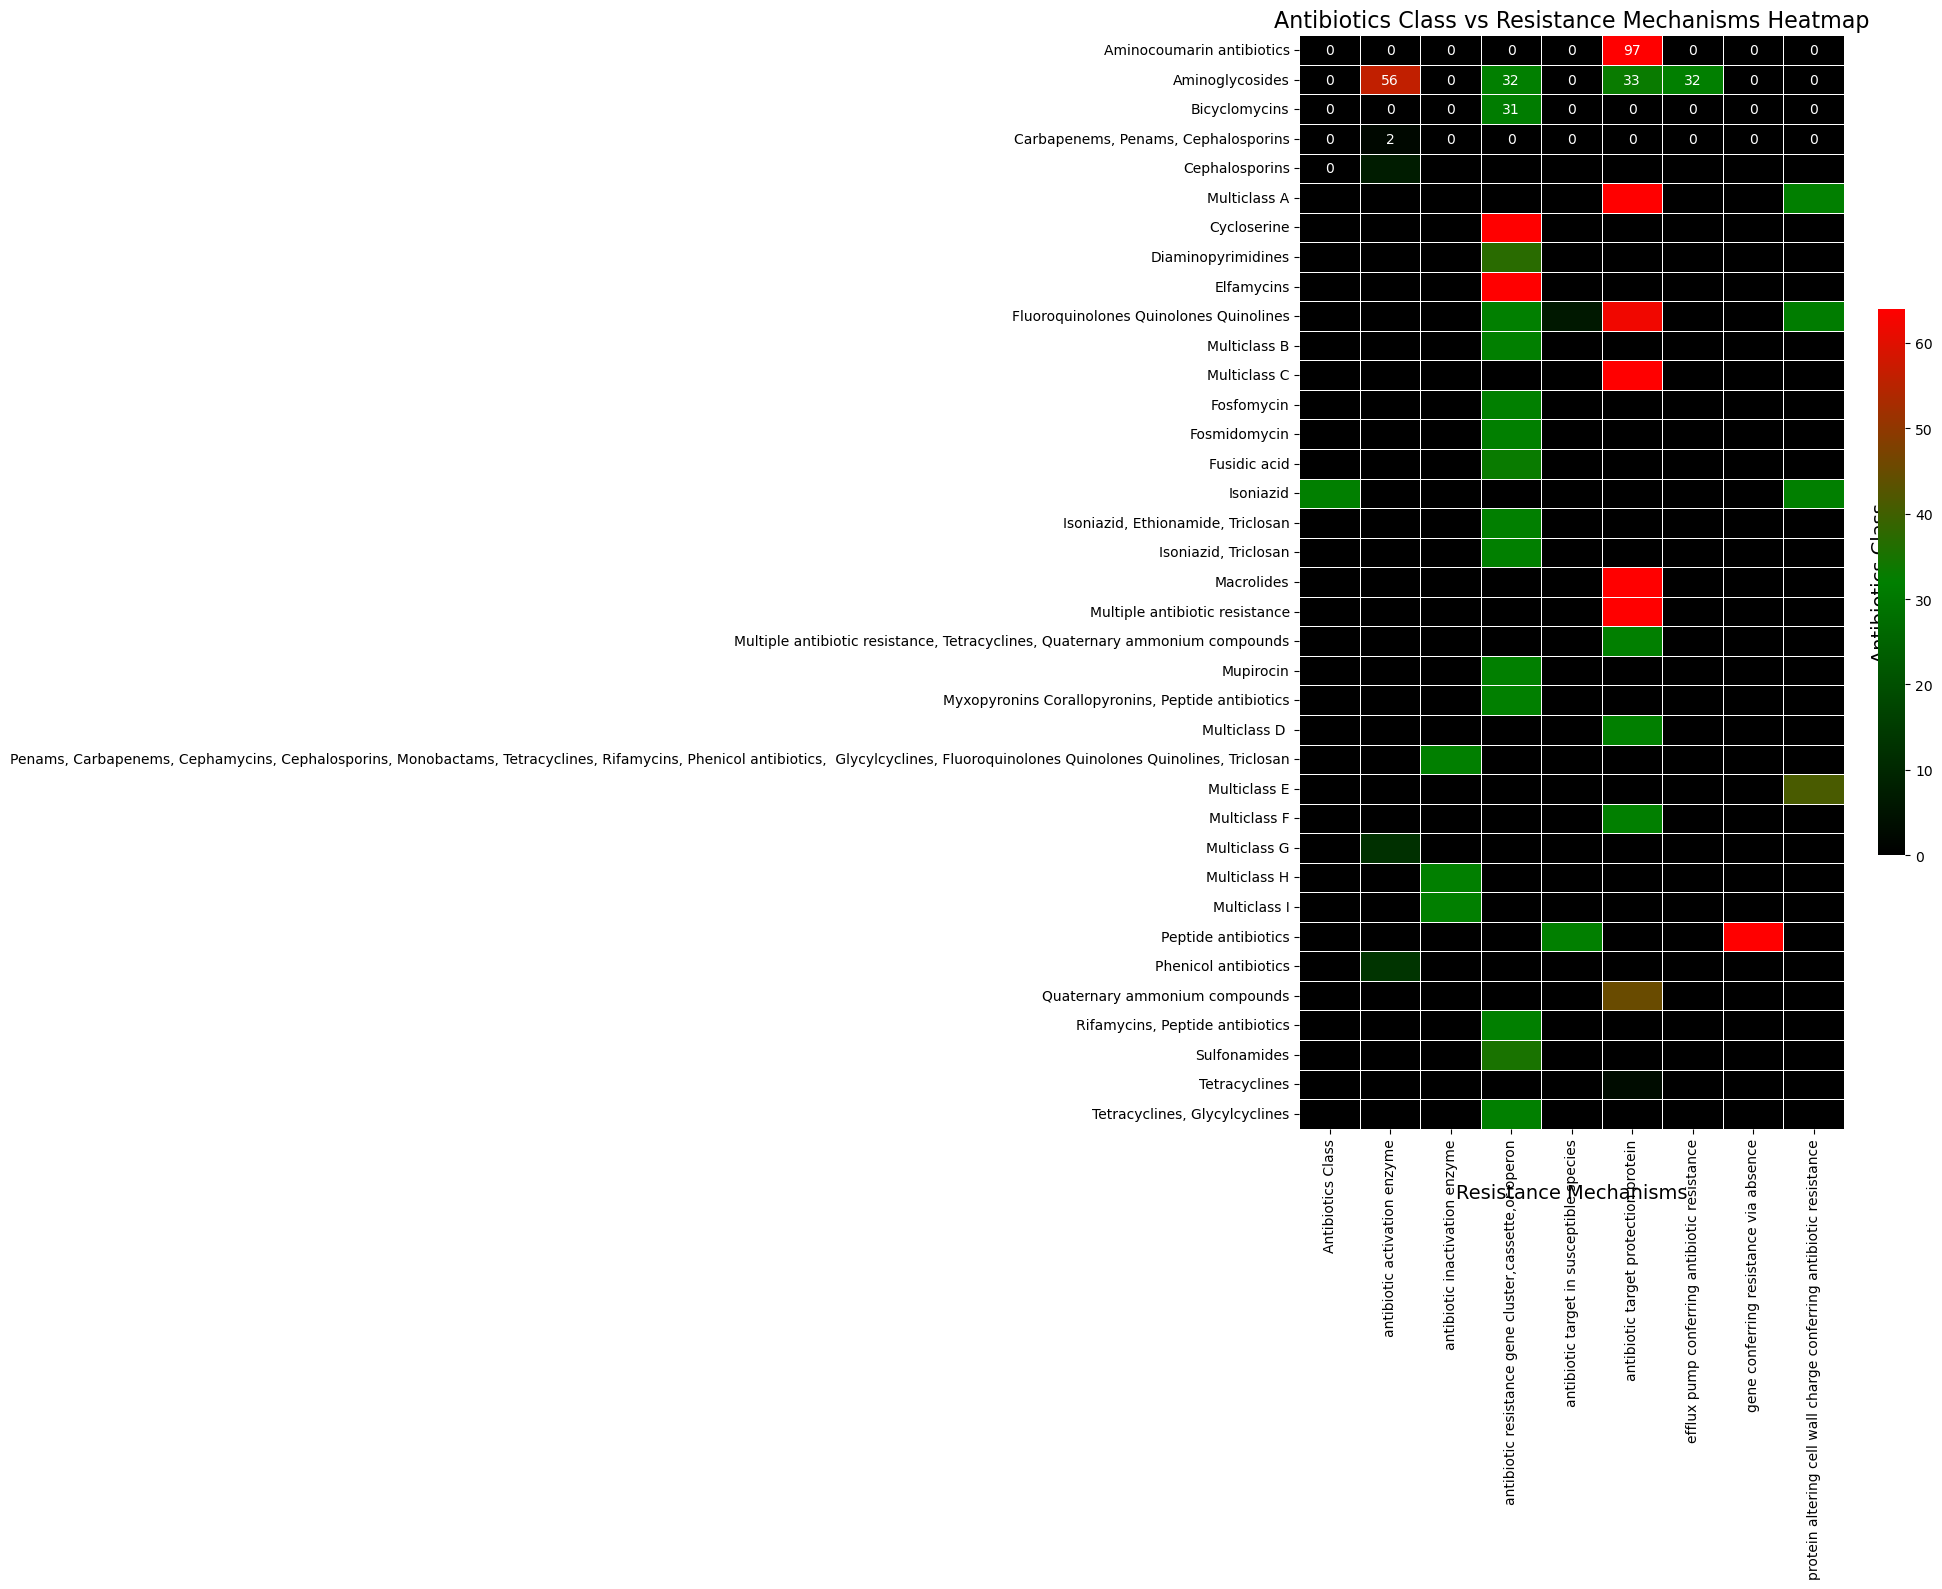

Heatmap has been successfully created and saved.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Read the CSV file
# Note: Replace with your actual file path if different
file_path = "Antibiotics Class-Classification.csv"

# Read the data
data = pd.read_csv(file_path)
print("Original data shape:", data.shape)
print("Columns:", data.columns.tolist())

# The first row contains the actual column names
real_columns = data.iloc[0].tolist()

# Set the 'Unnamed: 0' column as the index (which contains Antibiotics Class names)
data = data.iloc[1:].copy()  # Skip the first row which has column descriptions
data = data.set_index(data.columns[0])
data.index.name = 'Antibiotics Class'

# Rename the columns with their actual meanings
column_map = {}
for i, col in enumerate(data.columns):
    if i < len(real_columns) and isinstance(real_columns[i], str) and real_columns[i].strip():
        column_map[col] = real_columns[i]
    else:
        # Keep the original name if no meaningful name is available
        column_map[col] = col
        
data = data.rename(columns=column_map)

# Convert all data to numeric, errors become NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Drop any rows that are all NaN or zero
data = data.loc[~(data.sum(axis=1) == 0)]

print("Data shape after cleaning:", data.shape)
print("Data preview after cleaning:")
print(data.head())

# Set the figure size (in inches)
plt.figure(figsize=(20, 16))

# Define custom color palette (black -> green -> red)
cmap = plt.cm.colors.LinearSegmentedColormap.from_list(
    "custom", ["black", "green", "red"], N=256
)

# Create the heatmap
heatmap = sns.heatmap(
    data,
    cmap=cmap,
    cbar=True,
    square=False,
    xticklabels=True,
    yticklabels=True,
    linewidths=0.5,
    linecolor='white',
    annot=True,  # Show the values
    fmt='g',     # Format as general number
    center=None,
    robust=True,
    cbar_kws={"shrink": 0.5}
)

# Adjust font sizes
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)

# Add title
plt.title("Antibiotics Class vs Resistance Mechanisms Heatmap", fontsize=16)

# Add axis labels with centered position for x-axis and right position for y-axis
plt.xlabel('Resistance Mechanisms', fontsize=14, labelpad=10)
plt.ylabel('Antibiotics Class', fontsize=14, labelpad=10)

# Position labels - x-axis centered, y-axis on the right
plt.gca().xaxis.set_label_coords(0.5, -0.05)  # Horizontal center, a bit below the axis
plt.gca().yaxis.set_label_coords(1.05, 0.5)   # To the right of the axis, vertical center

# Set the y-label to be right-aligned
ax = plt.gca()
ax.yaxis.set_label_position("right")

# Set margins
plt.tight_layout()

# Save the figure to the current working directory
output_file = "Antibiotics_Class_Resistance_heatmap.png"
print(f"Saving heatmap to: {output_file}")
plt.savefig(output_file, dpi=100, bbox_inches='tight')

# Display the plot in the notebook
plt.show()

print("Heatmap has been successfully created and saved.")

Reading data from: Datasets/Antibiotics Class-Classification.csv
Original data shape: (38, 10)
Data shape after cleaning: (36, 9)
Preview of processed data:
                                        Aminocoumarin antibiotics  \
Antibiotics Class                                                   
Aminoglycosides                                                 0   
Elfamycins                                                      0   
Fluoroquinolones Quinolones Quinolines                          0   

                                        antibiotic inactivation enzyme  \
Antibiotics Class                                                        
Aminoglycosides                                                     56   
Elfamycins                                                           0   
Fluoroquinolones Quinolones Quinolines                               0   

                                        antibiotic resistance gene cluster,cassette,or operon  \
Antibiotics Class            

TypeError: can only concatenate str (not "function") to str

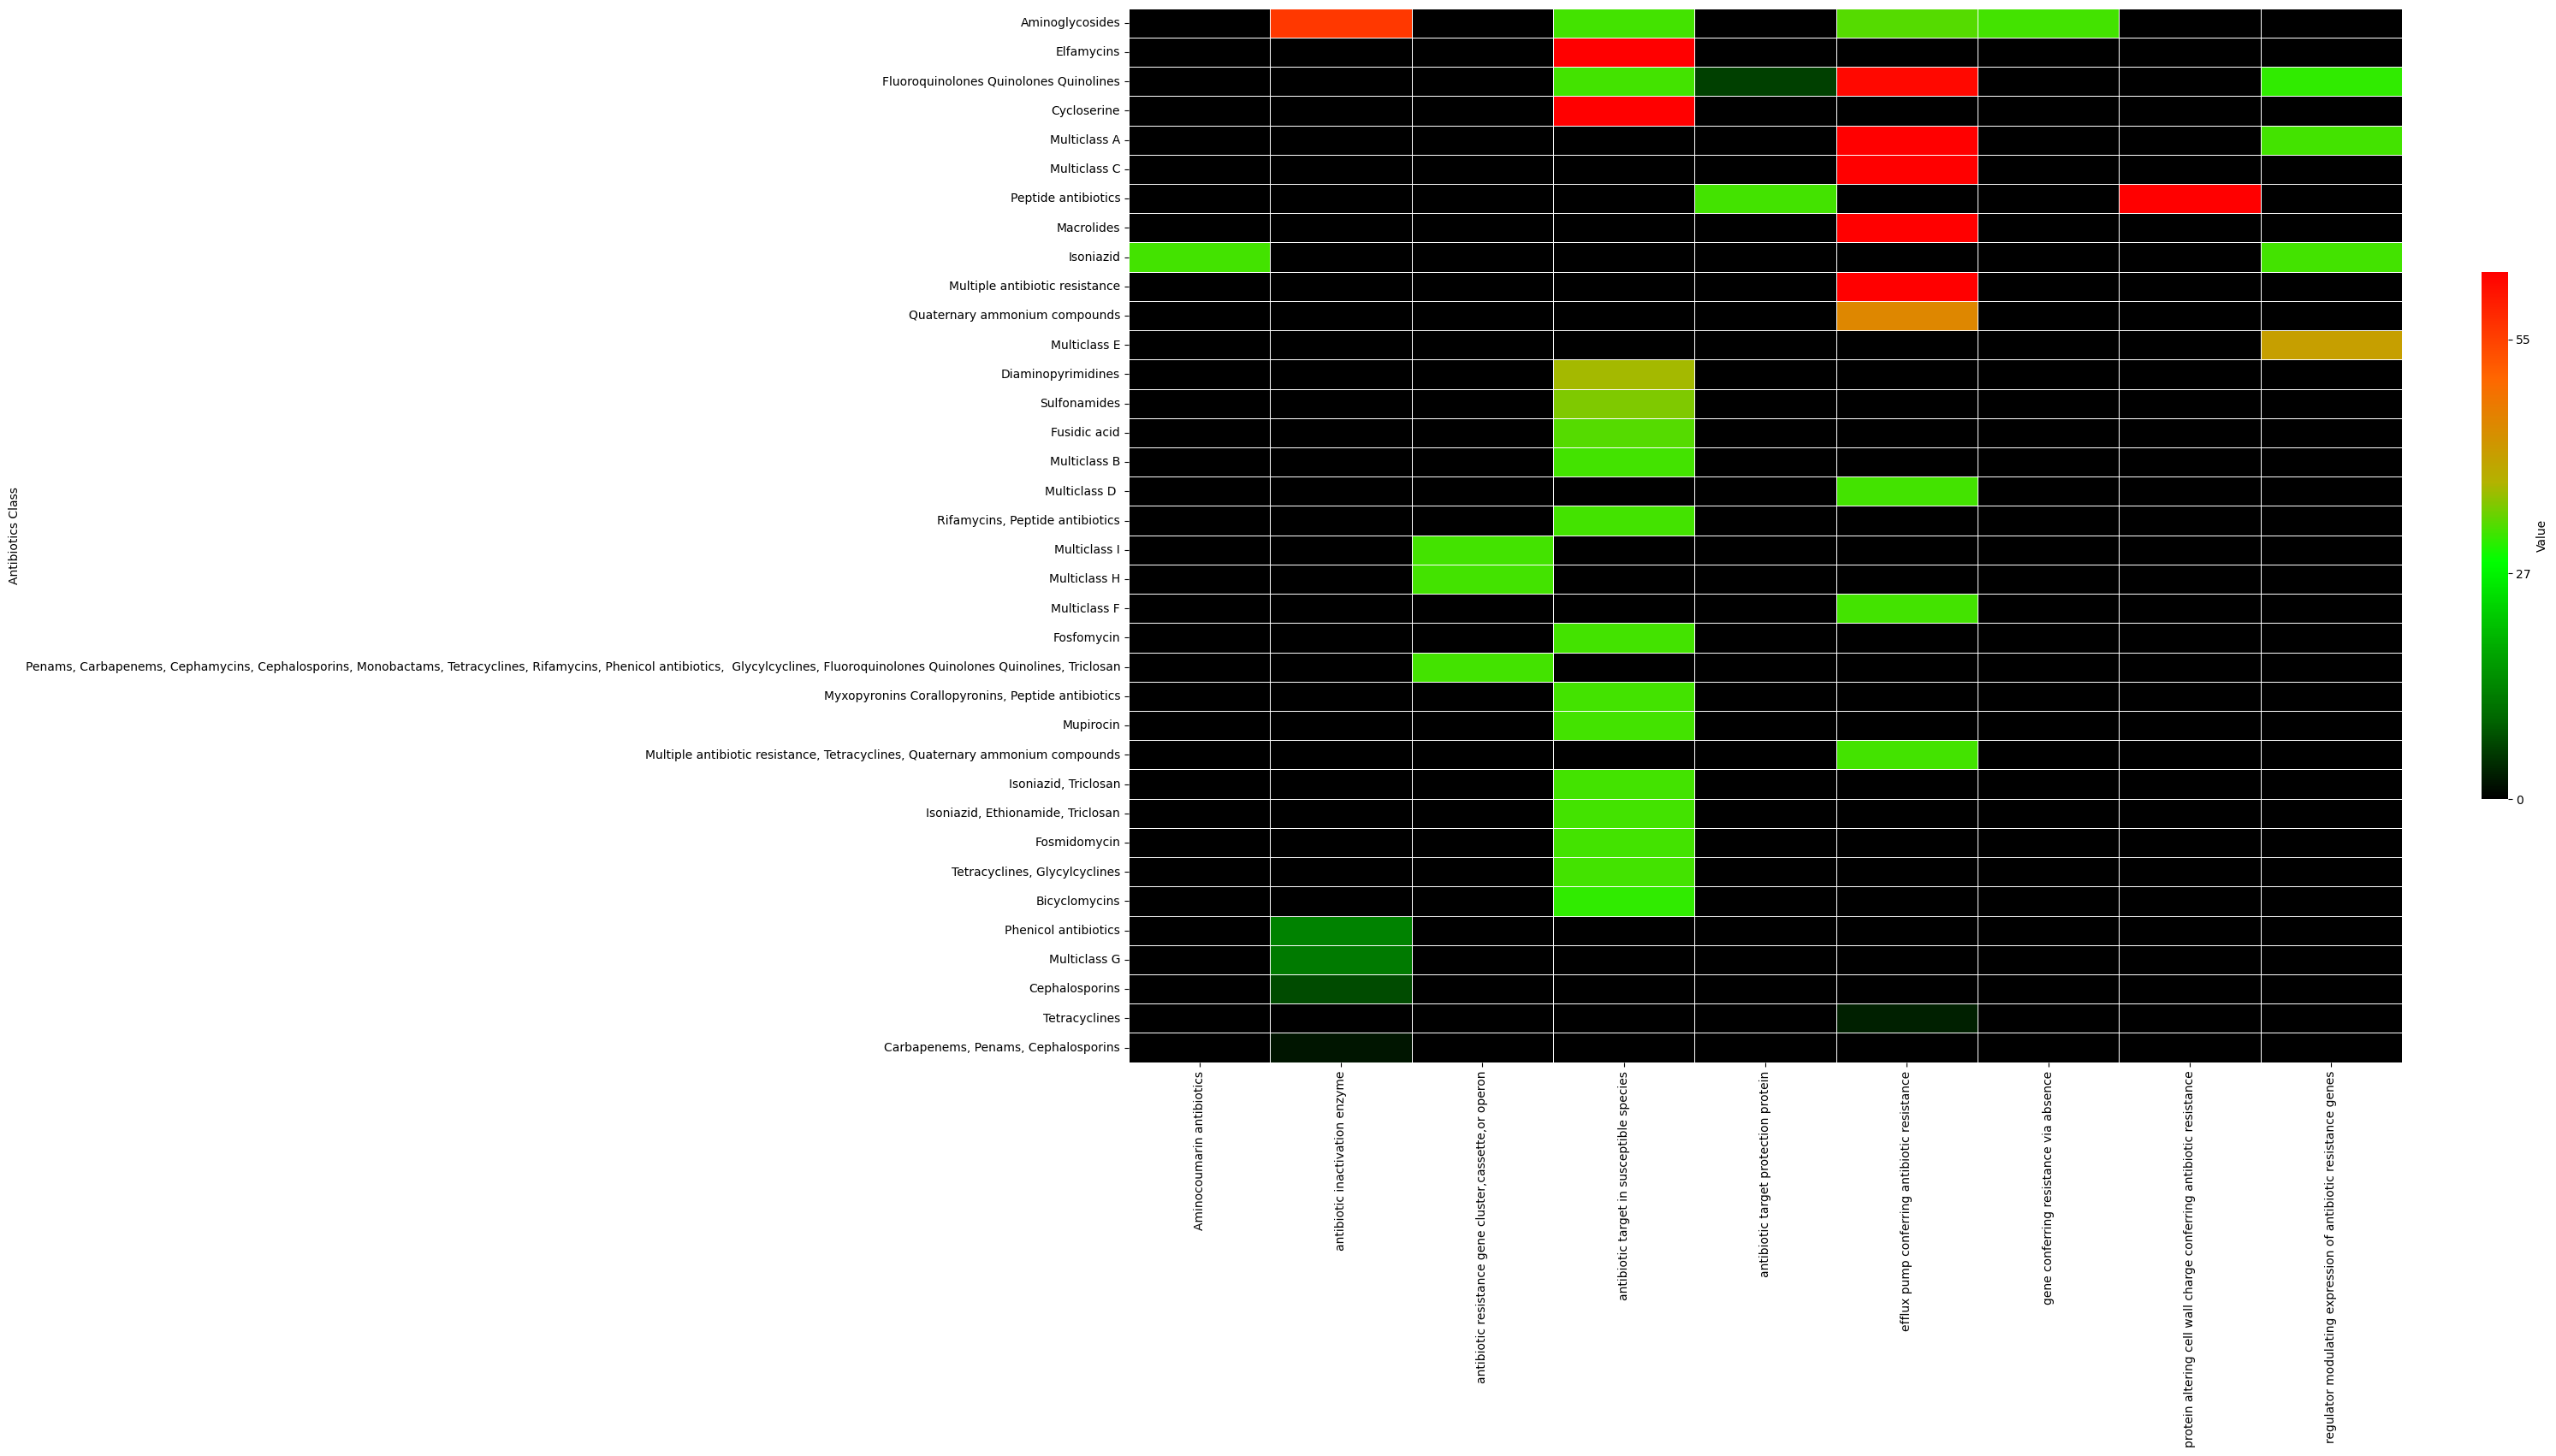

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import os

# Configuration
FIGURE_WIDTH = 24        # Width in inches
FIGURE_HEIGHT = 16       # Height in inches
HIDE_ZEROS = True        # Hide zero values
VALUE_FONT_SIZE = 10     # Font size for cell values
OUTPUT_FILE = "Improved_Antibiotics_Class_Resistance_heatmap.png"
DPI = 150                # Resolution for saved image

# Read the CSV file
file_path = "Datasets/Antibiotics Class-Classification.csv"
print(f"Reading data from: {file_path}")

# Read the data
data = pd.read_csv(file_path)
print(f"Original data shape: {data.shape}")

# The first row contains the actual column names
real_columns = data.iloc[0].tolist()

# Set the 'Unnamed: 0' column as the index (which contains Antibiotics Class names)
data = data.iloc[1:].copy()  # Skip the first row which has column descriptions
data = data.set_index(data.columns[0])
data.index.name = 'Antibiotics Class'

# Rename the columns with their actual meanings
column_map = {}
for i, col in enumerate(data.columns):
    if i < len(real_columns) and isinstance(real_columns[i], str) and real_columns[i].strip():
        column_map[col] = real_columns[i]
    else:
        # Keep the original name if no meaningful name is available
        column_map[col] = col
        
data = data.rename(columns=column_map)

# Convert all data to numeric, errors become NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Replace NaN with 0 for visualization
data = data.fillna(0)

# Drop any rows that are all zero
data = data.loc[~(data.sum(axis=1) == 0)]

# Calculate row sums for sorting (to place more relevant classes at top)
data['row_sum'] = data.sum(axis=1)
data = data.sort_values('row_sum', ascending=False)
data = data.drop(columns=['row_sum'])  # Remove the sum column after sorting

print(f"Data shape after cleaning: {data.shape}")
print("Preview of processed data:")
print(data.head(3))

# Function to format annotations based on value
def fmt_func(val):
    if HIDE_ZEROS and val == 0:
        return ""  # Don't show zeros in the heatmap
    return int(val) if val.is_integer() else f"{val:.1f}"

# Set up the figure
plt.figure(figsize=(FIGURE_WIDTH, FIGURE_HEIGHT))

# Create enhanced colormap (black -> green -> red)
# Better color progression for visual clarity
colors = [
    (0.0, 0.0, 0.0),      # Black for 0
    (0.0, 0.4, 0.0),      # Dark green
    (0.0, 0.7, 0.0),      # Medium green
    (0.0, 1.0, 0.0),      # Bright green
    (0.7, 0.7, 0.0),      # Yellow-green transition
    (1.0, 0.4, 0.0),      # Orange
    (1.0, 0.0, 0.0)       # Red for highest values
]

vmin = data.values.min()
vmax = data.values.max()
midpoint = vmax / 2

# Create positions for a smoother gradient
positions = [0, 0.15, 0.3, 0.45, 0.6, 0.8, 1.0]
custom_cmap = LinearSegmentedColormap.from_list('custom', list(zip(positions, colors)))

# Create the heatmap with enhanced styling
heatmap = sns.heatmap(
    data,
    cmap=custom_cmap,
    cbar=True,
    square=False,
    xticklabels=True,
    yticklabels=True,
    linewidths=0.5,
    linecolor='white',
    annot=True,
    fmt=fmt_func,
    annot_kws={"size": VALUE_FONT_SIZE, "weight": "bold"},
    robust=True,
    cbar_kws={
        "shrink": 0.5,
        "label": "Value",
        "ticks": np.linspace(vmin, vmax, num=min(6, int(vmax-vmin)+1)).astype(int)
    }
)

# Adjust font sizes and rotation
plt.xticks(fontsize=11, rotation=45, ha='right')  # Improved angle for readability
plt.yticks(fontsize=12)

# Add title and labels with better styling
plt.title("Antibiotics Class vs Resistance Mechanisms", fontsize=20, pad=20, weight='bold')
plt.xlabel('Resistance Mechanisms', fontsize=16, labelpad=15)
plt.ylabel('Antibiotics Class', fontsize=16, labelpad=15)

# Position labels - x-axis centered, y-axis on the right
plt.gca().xaxis.set_label_coords(0.5, -0.1)  # Horizontal center, a bit below the axis
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.set_label_coords(1.05, 0.5)  # To the right of the axis, vertical center

# Add grid for better readability
for i in range(len(data.index)):
    plt.axhline(y=i, color='white', linewidth=0.5)
for i in range(len(data.columns)):
    plt.axvline(x=i, color='white', linewidth=0.5)

# Set tight layout for better spacing
plt.tight_layout()

# Save the figure with higher quality
print(f"Saving improved heatmap to: {OUTPUT_FILE}")
plt.savefig(OUTPUT_FILE, dpi=DPI, bbox_inches='tight')
print(f"Heatmap saved successfully at {DPI} DPI.")

# Display the plot
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(f"Number of antibiotic classes: {len(data.index)}")
print(f"Number of resistance mechanisms: {len(data.columns)}")
print(f"Value range: {vmin} to {vmax}")
print(f"Non-zero entries: {(data != 0).sum().sum()}")
print(f"Percentage of filled cells: {(data != 0).sum().sum() / (len(data.index) * len(data.columns)) * 100:.1f}%")

Original data shape: (36, 34)
Columns: ['Antibiotics Class', 'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 'ST9', 'ST10', 'ST11', 'ST12', 'ST13', 'ST14', 'ST15', 'ST16', 'ST17', 'ST18', 'ST19', 'ST20', 'ST21', 'ST22', 'ST23', 'ST24', 'ST25', 'ST26', 'ST27', 'ST28', 'ST29', 'ST30', 'ST31', 'ST32', 'ST33']
Data shape after cleaning: (36, 33)
Data preview after cleaning:
                                     ST1  ST2  ST3  ST4  ST5  ST6  ST7  ST8  \
Antibiotics Class                                                             
Aminocoumarin antibiotics              3    3    3    3    3    3    3    3   
Aminoglycosides                        6    4    4    6    4    4    4    4   
Bicyclomycins                          1    1    1    1    1    1    1    1   
Carbapenems, Penams, Cephalosporins    0    0    0    0    0    0    0    0   
Cephalosporins                         0    0    0    1    0    0    0    0   

                                     ST9  ST10  ...  ST24  ST25  

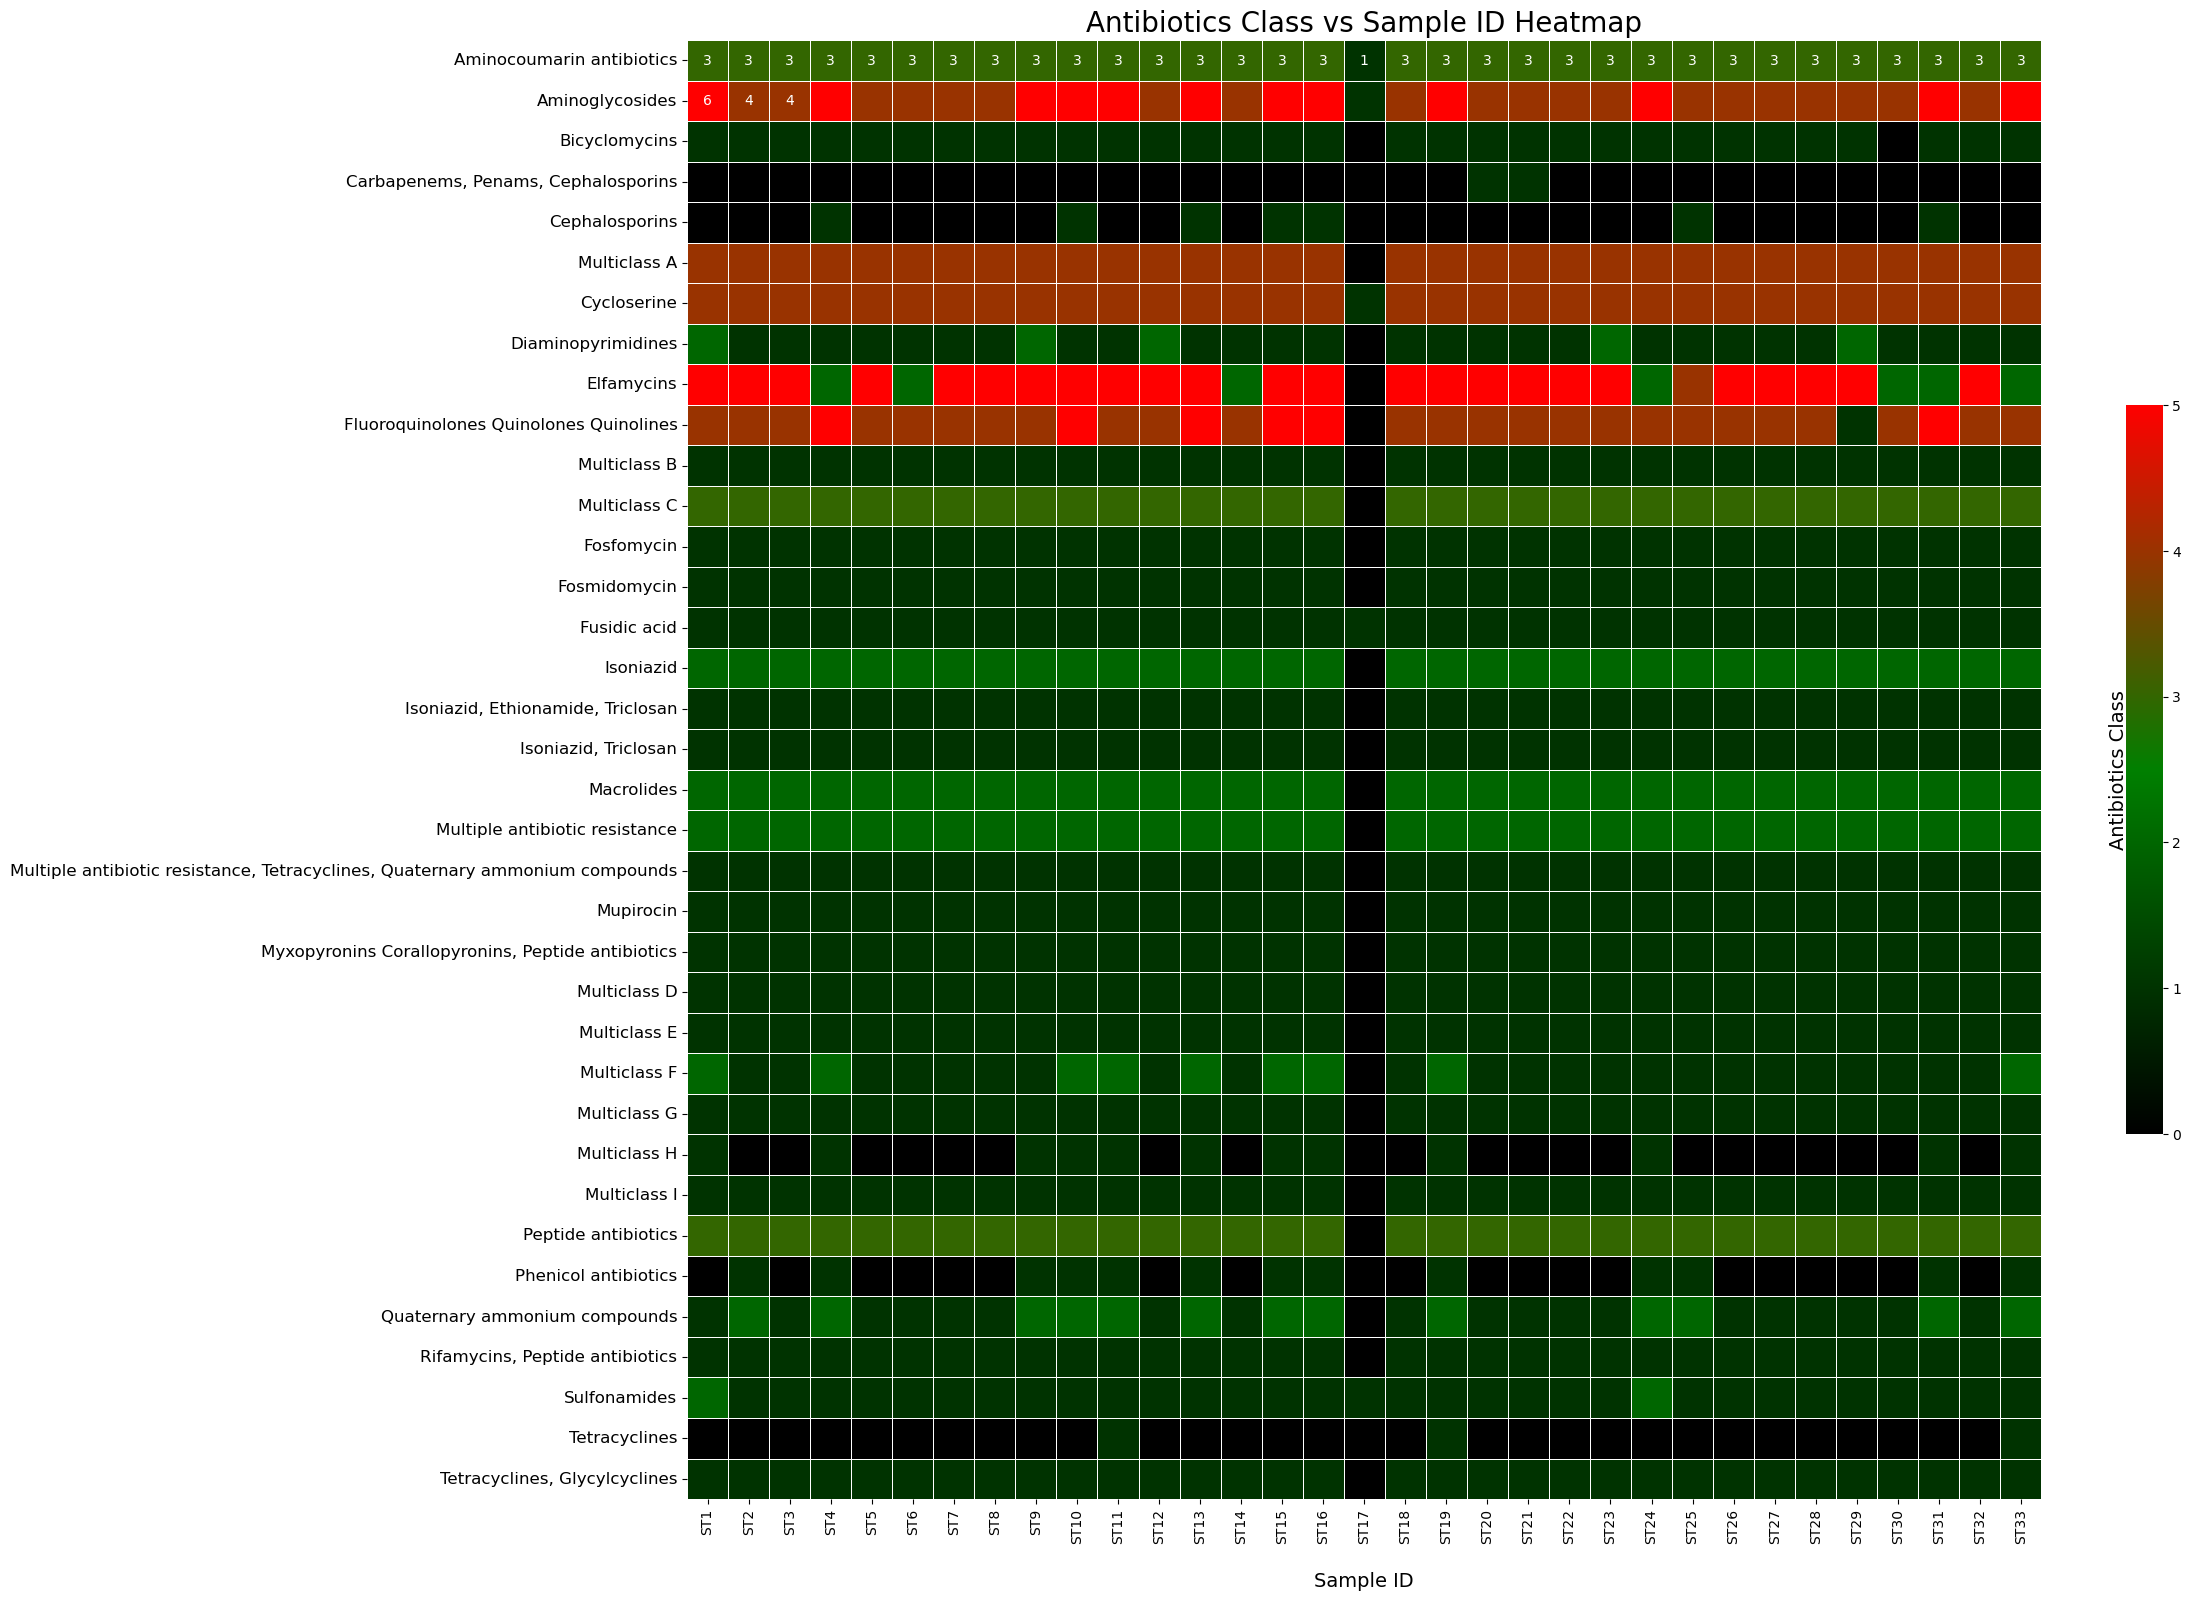

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Read the data
data = pd.read_csv('Datasets/Antibiotics Class-SampleID.csv')
print("Original data shape:", data.shape)
print("Columns:", data.columns.tolist())

# Set the 'Antibiotics Class' column as the index
data = data.set_index('Antibiotics Class')

# Convert all data to numeric, errors become NaN
data = data.apply(pd.to_numeric, errors='coerce')

print("Data shape after cleaning:", data.shape)
print("Data preview after cleaning:")
print(data.head())

# Set the figure size (in inches) - make it large enough for many columns
plt.figure(figsize=(24, 16))

# Define custom color palette (black -> green -> red)
cmap = plt.cm.colors.LinearSegmentedColormap.from_list(
    "custom", ["black", "green", "red"], N=256
)

# Create the heatmap
heatmap = sns.heatmap(
    data,
    cmap=cmap,
    cbar=True,
    square=False,
    xticklabels=True,
    yticklabels=True,
    linewidths=0.5,
    linecolor='white',
    annot=True,  # Show the values
    fmt='g',     # Format as general number
    center=None,
    robust=True,
    cbar_kws={"shrink": 0.5}
)

# Adjust font sizes
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=12)

# Add title
plt.title("Antibiotics Class vs Sample ID Heatmap", fontsize=20)

# Add axis labels
plt.xlabel('Sample ID', fontsize=14, labelpad=20)
plt.ylabel('Antibiotics Class', fontsize=14, labelpad=20)

# Position labels - x-axis centered, y-axis on the right
plt.gca().xaxis.set_label_coords(0.5, -0.05)  # Horizontal center, a bit below the axis
plt.gca().yaxis.set_label_coords(1.05, 0.5)   # To the right of the axis, vertical center

# Set the y-label to be right-aligned
ax = plt.gca()
ax.yaxis.set_label_position("right")

# Set margins
plt.tight_layout()

# Save the figure
output_file = "Antibiotics_ClassSampleID_heatmap.png"
print(f"Saving heatmap to: {output_file}")
plt.savefig(output_file, dpi=100, bbox_inches='tight')

print("Heatmap has been successfully created and saved.")

# Display the plot (for Jupyter notebook)
plt.show()

Original data shape: (46, 34)
Columns: ['Antibiotics', 'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 'ST9', 'ST10', 'ST11', 'ST12', 'ST13', 'ST14', 'ST15', 'ST16', 'ST17', 'ST18', 'ST19', 'ST20', 'ST21', 'ST22', 'ST23', 'ST24', 'ST25', 'ST26', 'ST27', 'ST28', 'ST29', 'ST30', 'ST31', 'ST32', 'ST33']
Data shape after cleaning: (46, 33)
Data preview after cleaning:
                                      ST1  ST2  ST3  ST4  ST5  ST6  ST7  ST8  \
Antibiotics                                                                    
novobiocin                              6    6    6    6    6    6    6    6   
nalidixic acid                          5    5    5    5    5    5    5    5   
kirromycin;enacyloxin IIa;pulvomycin    5    5    5    2    5    2    5    5   
D-cycloserine                           4    4    4    4    4    4    4    4   
colistin                                4    4    4    4    4    4    4    4   

                                      ST9  ST10  ...  ST24  ST25

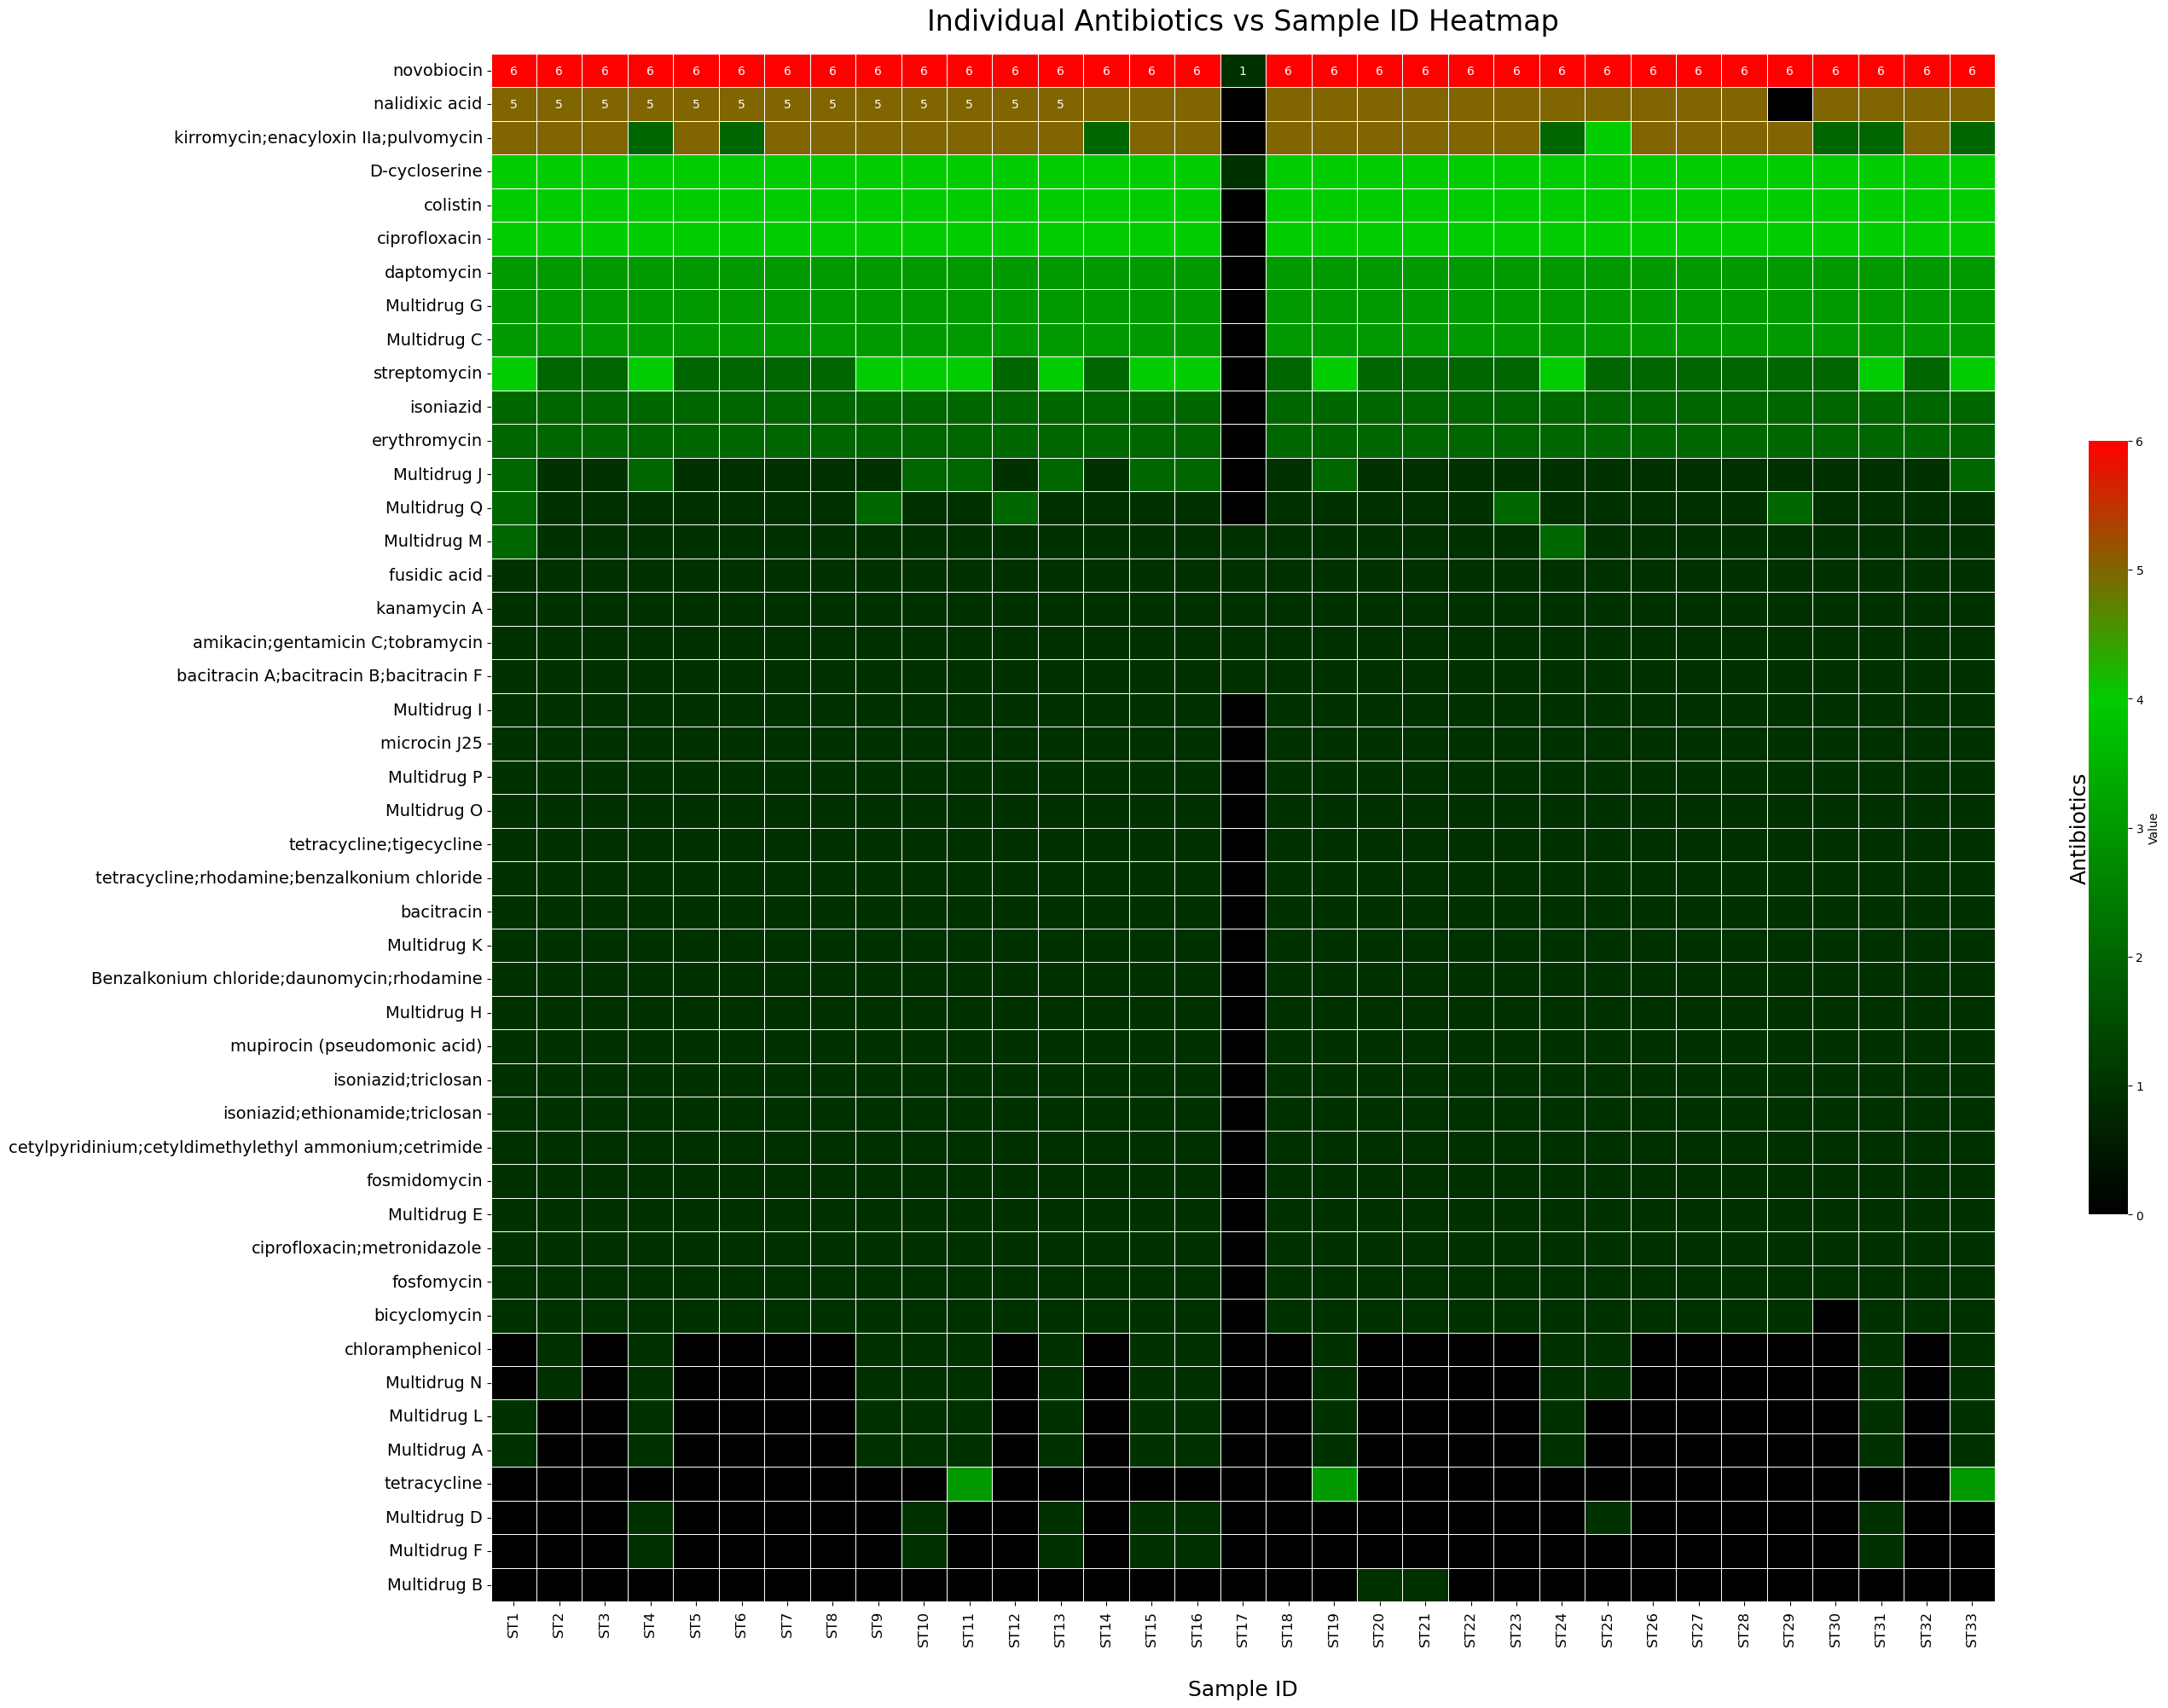

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.colors import LinearSegmentedColormap

# Read the data
data = pd.read_csv('Datasets/Antibiotics-SampleID.csv')
print("Original data shape:", data.shape)
print("Columns:", data.columns.tolist())

# Set the 'Antibiotics' column as the index
data = data.set_index('Antibiotics')

# Convert all data to numeric, errors become NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Calculate row sums for sorting
data['row_sum'] = data.sum(axis=1)
data = data.sort_values('row_sum', ascending=False)
data = data.drop(columns=['row_sum'])  # Remove the sum column after sorting

print("Data shape after cleaning:", data.shape)
print("Data preview after cleaning:")
print(data.head())

# Set the figure size (in inches) - make it large enough for many columns
plt.figure(figsize=(28, 20))

# Create custom colormap that matches your example (black -> green -> red)
# Adjust for the range of values in your data
vmin = data.values.min()
vmax = data.values.max()
midpoint = 3  # Assuming 3 is a midpoint value based on your data

# Create a custom colormap with midpoint at 3
colors = [(0, 0, 0), (0, 0.6, 0), (0, 0.8, 0), (1, 0, 0)]  # Black -> Green -> Bright Green -> Red
positions = [0, midpoint/vmax, (midpoint+1)/vmax, 1]
custom_cmap = LinearSegmentedColormap.from_list('custom', list(zip(positions, colors)))

# Create the heatmap
heatmap = sns.heatmap(
    data,
    cmap=custom_cmap,
    cbar=True,
    square=False,
    xticklabels=True,
    yticklabels=True,
    linewidths=0.5,
    linecolor='white',
    annot=True,  # Show the values
    fmt='g',     # Format as general number
    center=None,
    robust=True,
    cbar_kws={
        "shrink": 0.5,
        "label": "Value",
        "ticks": np.arange(vmin, vmax+1)
    }
)

# Adjust font sizes
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=14)

# Add title
plt.title("Individual Antibiotics vs Sample ID Heatmap", fontsize=24, pad=20)

# Add axis labels
plt.xlabel('Sample ID', fontsize=18, labelpad=20)
plt.ylabel('Antibiotics', fontsize=18, labelpad=20)

# Position labels - x-axis centered, y-axis on the right
plt.gca().xaxis.set_label_coords(0.5, -0.05)  # Horizontal center, a bit below the axis
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.set_label_coords(1.05, 0.5)   # To the right of the axis, vertical center

# Add grid for better readability
for i in range(len(data.index)):
    plt.axhline(y=i, color='white', linewidth=0.5)
for i in range(len(data.columns)):
    plt.axvline(x=i, color='white', linewidth=0.5)

# Set margins
plt.tight_layout()

# Save the figure
output_file = "Individual_Antibiotics_SampleID_heatmap.png"
print(f"Saving heatmap to: {output_file}")
plt.savefig(output_file, dpi=150, bbox_inches='tight')

print("Heatmap has been successfully created and saved.")

# Display the plot (for Jupyter notebook)
plt.show()

Original data shape: (50, 34)
Columns: ['Classification', 'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 'ST9', 'ST10', 'ST11', 'ST12', 'ST13', 'ST14', 'ST15', 'ST16', 'ST17', 'ST18', 'ST19', 'ST20', 'ST21', 'ST22', 'ST23', 'ST24', 'ST25', 'ST26', 'ST27', 'ST28', 'ST29', 'ST30', 'ST31', 'ST32', 'ST33']
Data shape after cleaning: (50, 33)
Data preview after cleaning:
                                                    ST1  ST2  ST3  ST4  ST5  \
Classification                                                                
efflux pump conferring antibiotic resistance         42   43   43   43   42   
antibiotic target in susceptible species             26   24   24   21   24   
efflux pump conferring antibiotic resistance,ge...    8    8    8    8    8   
regulator modulating expression of antibiotic r...    5    4    4    5    4   
antibiotic resistant gene variant or mutant,eff...    4    4    4    4    4   

                                                    ST6  ST7  ST8  S

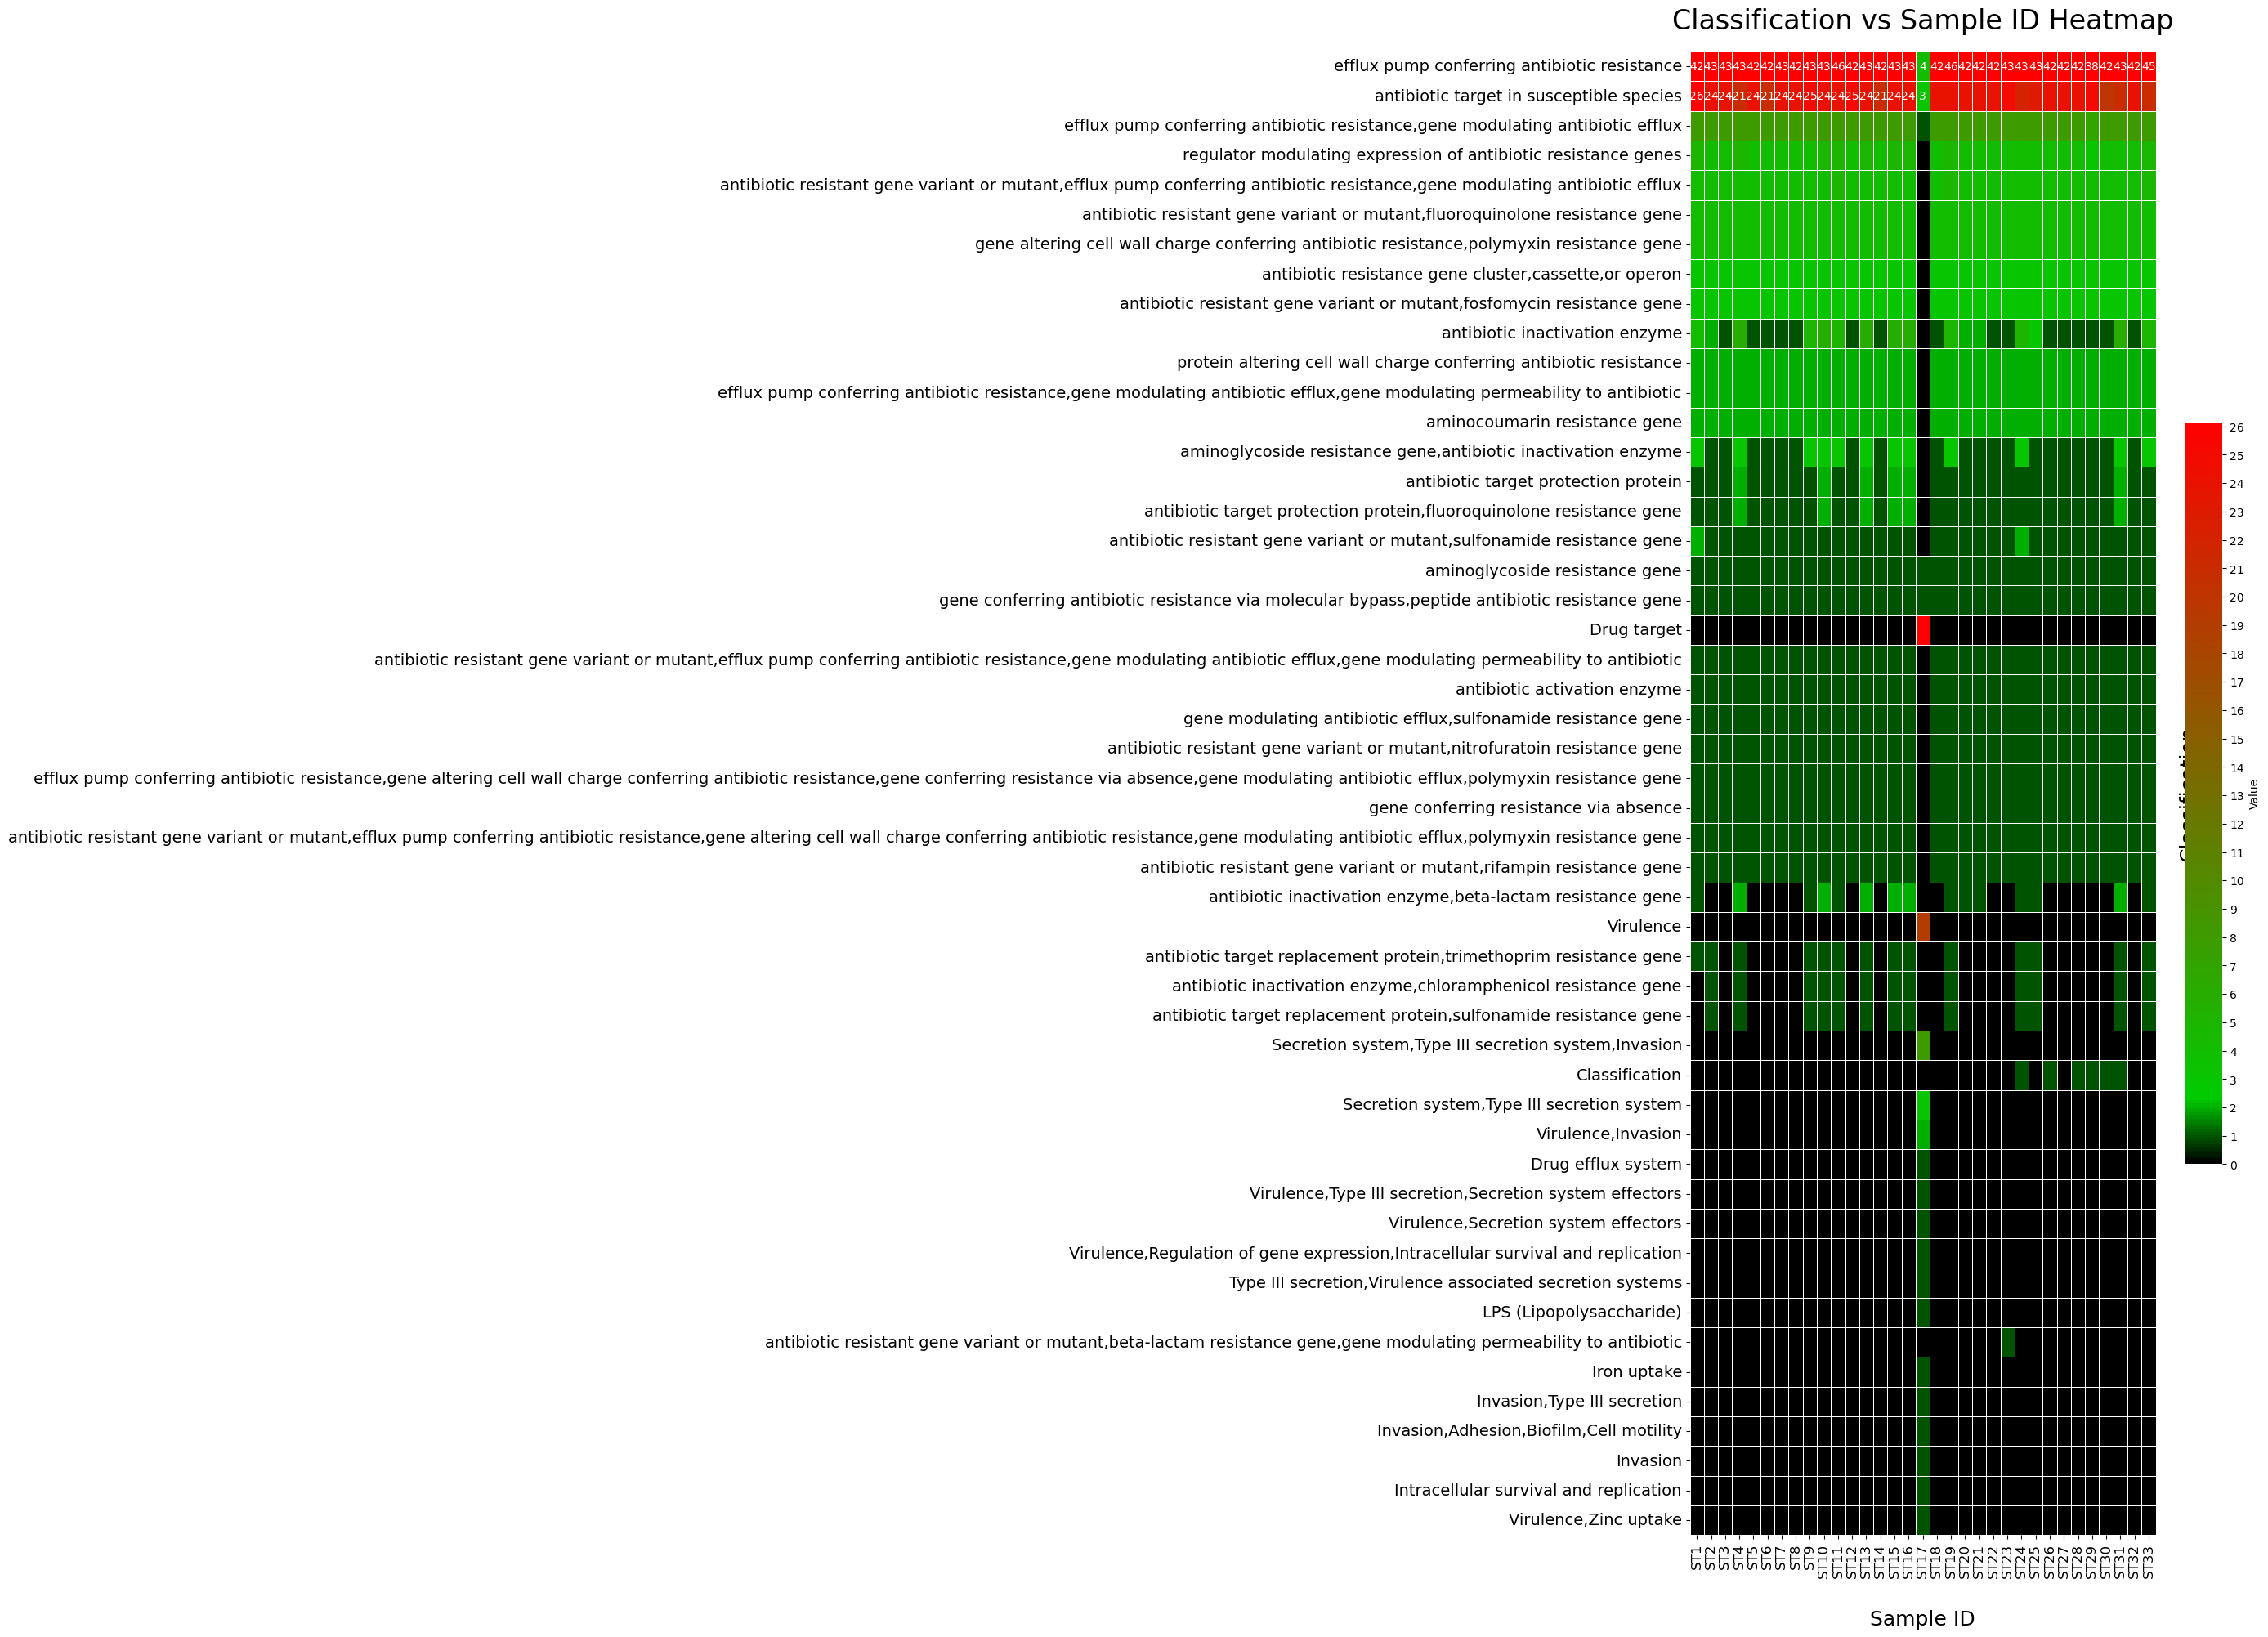

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Read the data
data = pd.read_csv('Datasets/Classification-SampleID.csv')
print("Original data shape:", data.shape)
print("Columns:", data.columns.tolist())

# Set the 'Classification' column as the index
data = data.set_index('Classification')

# Convert all data to numeric, errors become NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Calculate row sums for sorting
data['row_sum'] = data.sum(axis=1)
data = data.sort_values('row_sum', ascending=False)
data = data.drop(columns=['row_sum'])  # Remove the sum column after sorting

print("Data shape after cleaning:", data.shape)
print("Data preview after cleaning:")
print(data.head())

# Set the figure size (in inches) - make it large enough for many columns
plt.figure(figsize=(28, 20))

# Create custom colormap that matches your example (black -> green -> red)
# Adjust for the range of values in your data
vmin = data.values.min()
vmax = data.values.max()
midpoint = 3  # Assuming 3 is a midpoint value based on your data

# Create a custom colormap with midpoint at 3
colors = [(0, 0, 0), (0, 0.6, 0), (0, 0.8, 0), (1, 0, 0)]  # Black -> Green -> Bright Green -> Red
positions = [0, midpoint/vmax, (midpoint+1)/vmax, 1]
custom_cmap = LinearSegmentedColormap.from_list('custom', list(zip(positions, colors)))

# Create the heatmap
heatmap = sns.heatmap(
    data,
    cmap=custom_cmap,
    cbar=True,
    square=False,
    xticklabels=True,
    yticklabels=True,
    linewidths=0.5,
    linecolor='white',
    annot=True,  # Show the values
    fmt='g',     # Format as general number
    center=None,
    robust=True,
    cbar_kws={
        "shrink": 0.5,
        "label": "Value",
        "ticks": np.arange(vmin, vmax+1)
    }
)

# Adjust font sizes
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=14)

# Add title
plt.title("Classification vs Sample ID Heatmap", fontsize=24, pad=20)

# Add axis labels
plt.xlabel('Sample ID', fontsize=18, labelpad=20)
plt.ylabel('Classification', fontsize=18, labelpad=20)

# Position labels - x-axis centered, y-axis on the right
plt.gca().xaxis.set_label_coords(0.5, -0.05)  # Horizontal center, a bit below the axis
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.set_label_coords(1.05, 0.5)   # To the right of the axis, vertical center

# Add grid for better readability
for i in range(len(data.index)):
    plt.axhline(y=i, color='white', linewidth=0.5)
for i in range(len(data.columns)):
    plt.axvline(x=i, color='white', linewidth=0.5)

# Set margins
plt.tight_layout()

# Save the figure
output_file = "Classification_SampleID_heatmap.png"
print(f"Saving heatmap to: {output_file}")
plt.savefig(output_file, dpi=150, bbox_inches='tight')
print("Heatmap has been successfully created and saved.")

# Display the plot (for Jupyter notebook)
plt.show()

Original data shape: (50, 34)
Data shape after cleaning: (50, 33)
Data preview after cleaning:
                                                 ST1  ST2  ST3  ST4  ST5  ST6  \
Classification                                                                  
efflux pump conferring antibiotic res...          42   43   43   43   42   42   
antibiotic target in susceptible species          26   24   24   21   24   21   
efflux pump conferring antibiotic resistance...    8    8    8    8    8    8   
regulator modulating expression of an...           5    4    4    5    4    4   
antibiotic resistant gene variant or mutant...     4    4    4    4    4    4   

                                                 ST7  ST8  ST9  ST10  ...  \
Classification                                                        ...   
efflux pump conferring antibiotic res...          43   42   43    43  ...   
antibiotic target in susceptible species          24   24   25    24  ...   
efflux pump conferring antibi

TypeError: can only concatenate str (not "function") to str

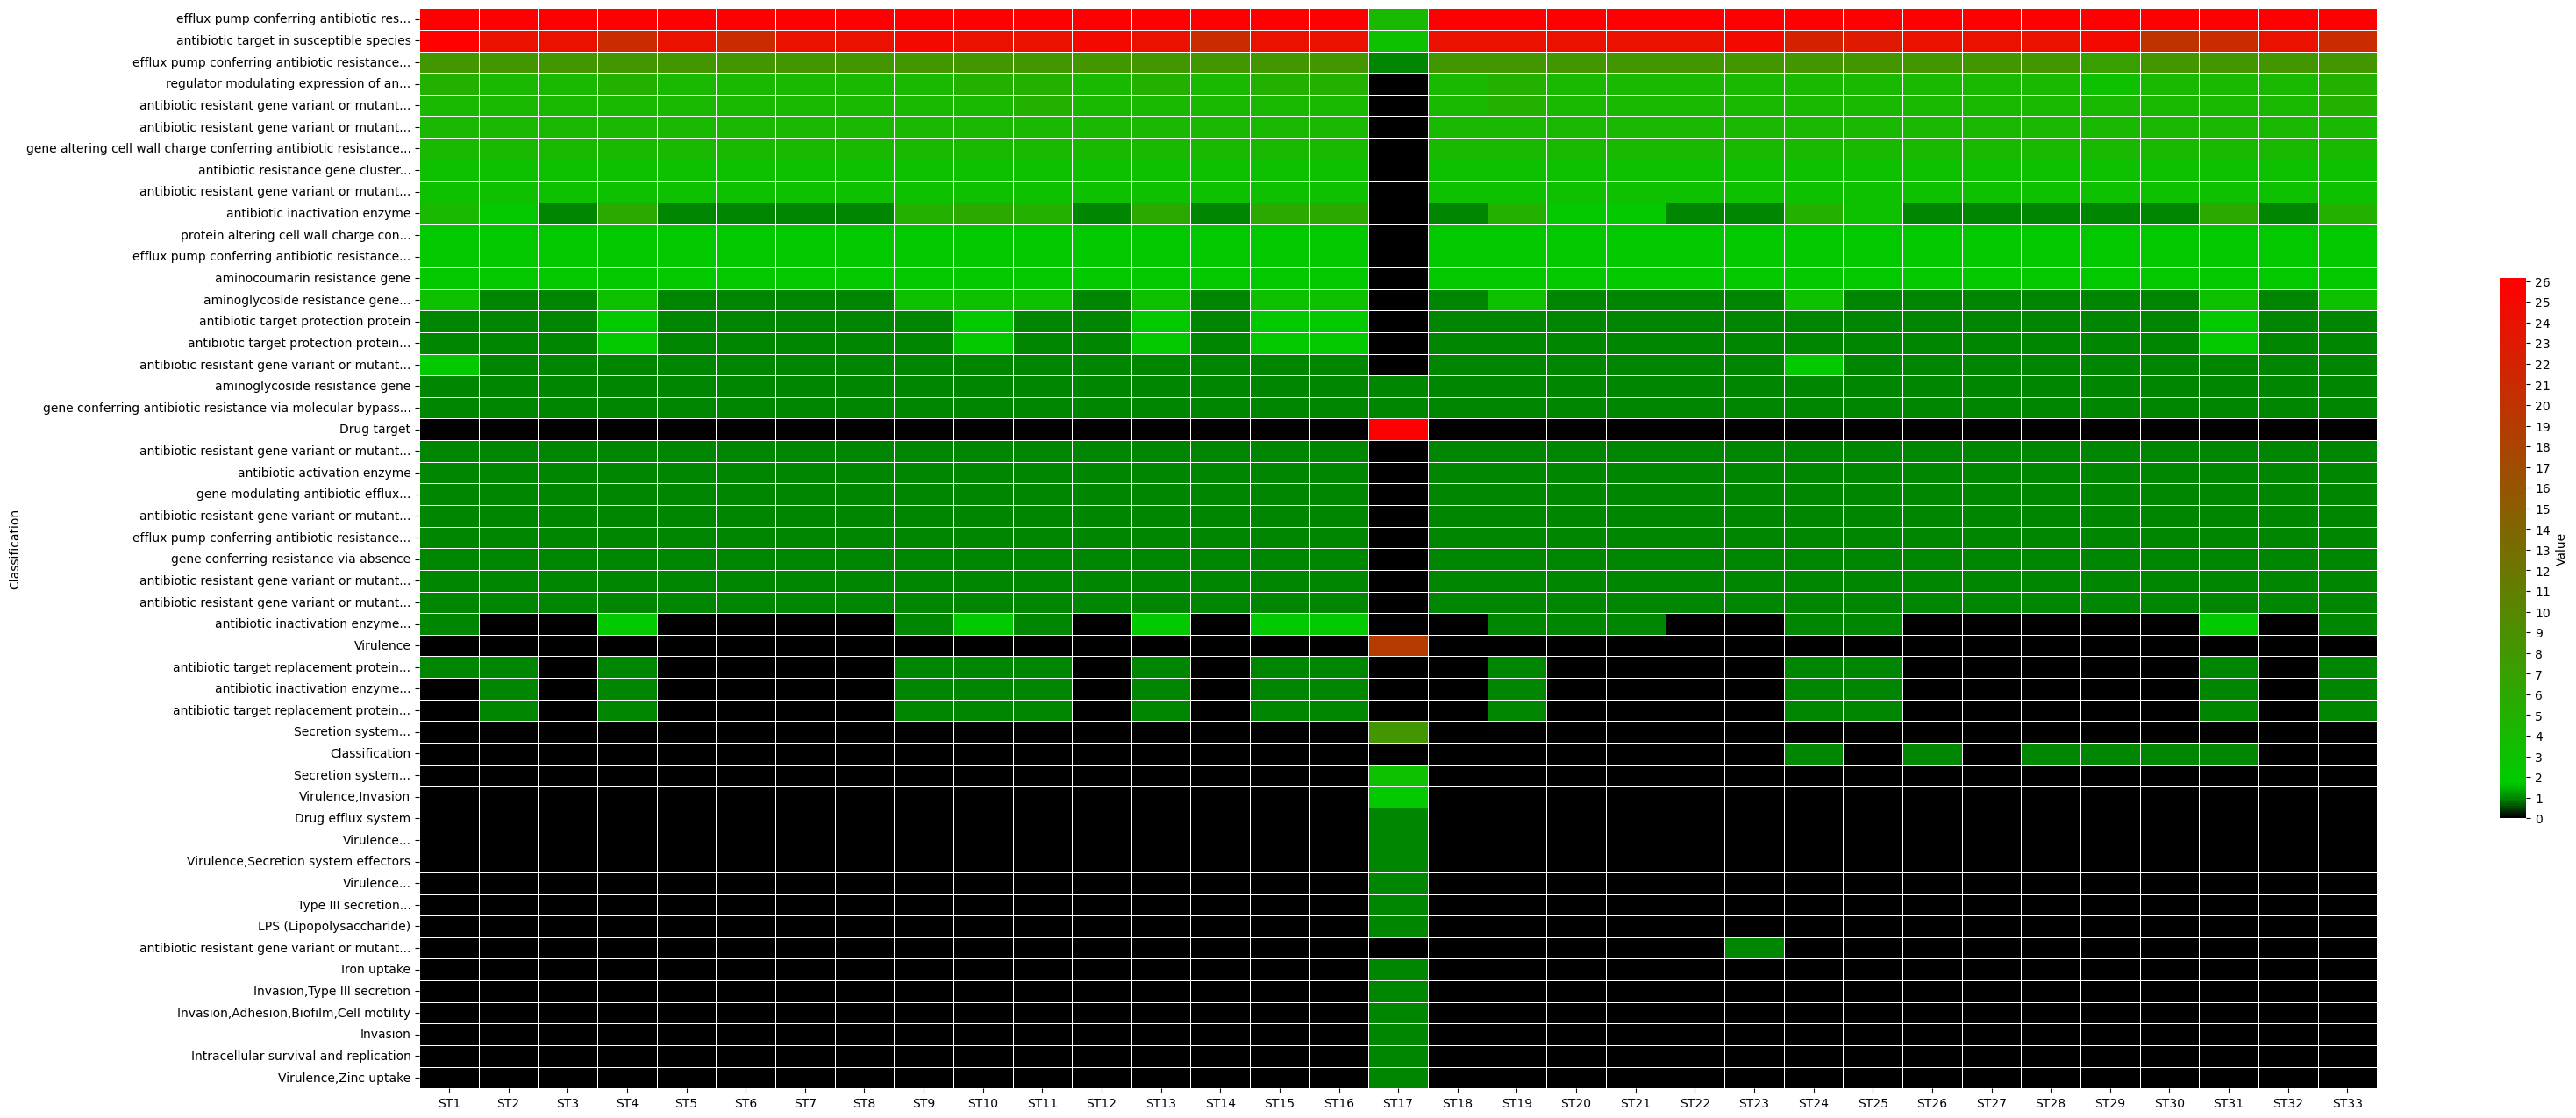

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import re

# Read the data
data = pd.read_csv('Datasets/Classification-SampleID.csv')
print("Original data shape:", data.shape)

# Function to shorten and clean classification names
def shorten_classification(name, max_length=40):
    # Remove any trailing/leading whitespace
    name = name.strip()
    
    # If the name is too long, shorten it
    if len(name) > max_length:
        # Try to find a logical break point
        if ',' in name:
            # Take just the first part
            shortened = name.split(',')[0] + "..."
        else:
            shortened = name[:max_length-3] + "..."
        return shortened
    return name

# Create a mapping of full names to shortened names
classification_mapping = {cls: shorten_classification(cls) for cls in data['Classification'].unique()}

# Create a copy of the dataframe with shortened classifications
data_display = data.copy()
data_display['Classification'] = data_display['Classification'].map(classification_mapping)

# Set the 'Classification' column as the index
data_display = data_display.set_index('Classification')

# Convert all data to numeric, errors become NaN
data_display = data_display.apply(pd.to_numeric, errors='coerce')

# Fill any NaN values with 0
data_display = data_display.fillna(0)

# Calculate row sums for sorting
data_display['row_sum'] = data_display.sum(axis=1)
data_display = data_display.sort_values('row_sum', ascending=False)
data_display = data_display.drop(columns=['row_sum'])  # Remove the sum column after sorting

print("Data shape after cleaning:", data_display.shape)
print("Data preview after cleaning:")
print(data_display.head())

# Create a function to format annotations based on value
def fmt_func(val):
    if val == 0:
        return ""  # Don't show zeros in the heatmap
    return int(val) if val.is_integer() else f"{val:.1f}"

# Set the figure size with a MUCH WIDER layout - adjust the width/height ratio
# Making it extra wide to accommodate the sample IDs
plt.figure(figsize=(36, 16))  # Significantly increased width compared to height

# Create custom colormap (black -> green -> red)
vmin = data_display.values.min()
vmax = data_display.values.max()
midpoint = 3  # Adjust based on your data

# Create a custom colormap with more pleasing colors
colors = [
    (0, 0, 0),           # Black for 0
    (0.0, 0.5, 0.0),     # Dark green 
    (0.0, 0.8, 0.0),     # Bright green
    (1.0, 0.0, 0.0)      # Red for highest values
]
positions = [0, midpoint/vmax/2, midpoint/vmax, 1]
custom_cmap = LinearSegmentedColormap.from_list('custom', list(zip(positions, colors)))

# Create the heatmap with better formatting
heatmap = sns.heatmap(
    data_display,
    cmap=custom_cmap,
    cbar=True,
    square=False,         # Explicitly not square to allow for wider cells
    xticklabels=True,
    yticklabels=True,
    linewidths=0.5,
    linecolor='white',
    annot=True,           # Show the values
    fmt=fmt_func,         # Use our custom formatter
    annot_kws={"size": 10}, # Increased annotation font size
    center=None,
    robust=True,
    cbar_kws={
        "shrink": 0.5,
        "label": "Value",
        "ticks": np.arange(vmin, vmax+1)
    }
)

# Adjust font sizes and rotation for better readability with wider layout
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

# Add title with better formatting
plt.title("Classification vs Sample ID Heatmap", fontsize=24, pad=20)

# Add axis labels
plt.xlabel('Sample ID', fontsize=18, labelpad=15)
plt.ylabel('Classification', fontsize=18, labelpad=15)

# Position labels
plt.gca().xaxis.set_label_coords(0.5, -0.05)
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.set_label_coords(1.05, 0.5)

# Use tight layout for better spacing
plt.tight_layout()

# Save the figure with higher resolution and wider aspect ratio
output_file = "Wide_Classification_SampleID_heatmap.png"
print(f"Saving heatmap to: {output_file}")
plt.savefig(output_file, dpi=200, bbox_inches='tight')
print("Improved wide heatmap has been successfully created and saved.")

# Create a lookup table for reference (optional)
print("\nCreating classification reference table...")
lookup_table = pd.DataFrame({
    'Shortened': list(classification_mapping.values()),
    'Full Classification': list(classification_mapping.keys())
})

# Save lookup table to CSV
lookup_table.to_csv("classification_lookup_table.csv", index=False)
print("Saved classification lookup table to: classification_lookup_table.csv")

Loading data...
Original data shape: (187, 50)
Processing data for visualization...
Data shape after preprocessing: (25, 20)
Sample of processed data:
             efflux pump conferring anti...  Drug target  Virulence  \
Gene                                                                  
EF-Tu                                     0            0          0   
MdtABC-TolC                              97            0          0   
AcrAB-TolC                               64            0          0   

             antibiotic target in suscep...  \
Gene                                          
EF-Tu                                   138   
MdtABC-TolC                               0   
AcrAB-TolC                                0   

             efflux pump conferring antibiotic resistance...  \
Gene                                                           
EF-Tu                                                      0   
MdtABC-TolC                                                0   
A

TypeError: can only concatenate str (not "function") to str

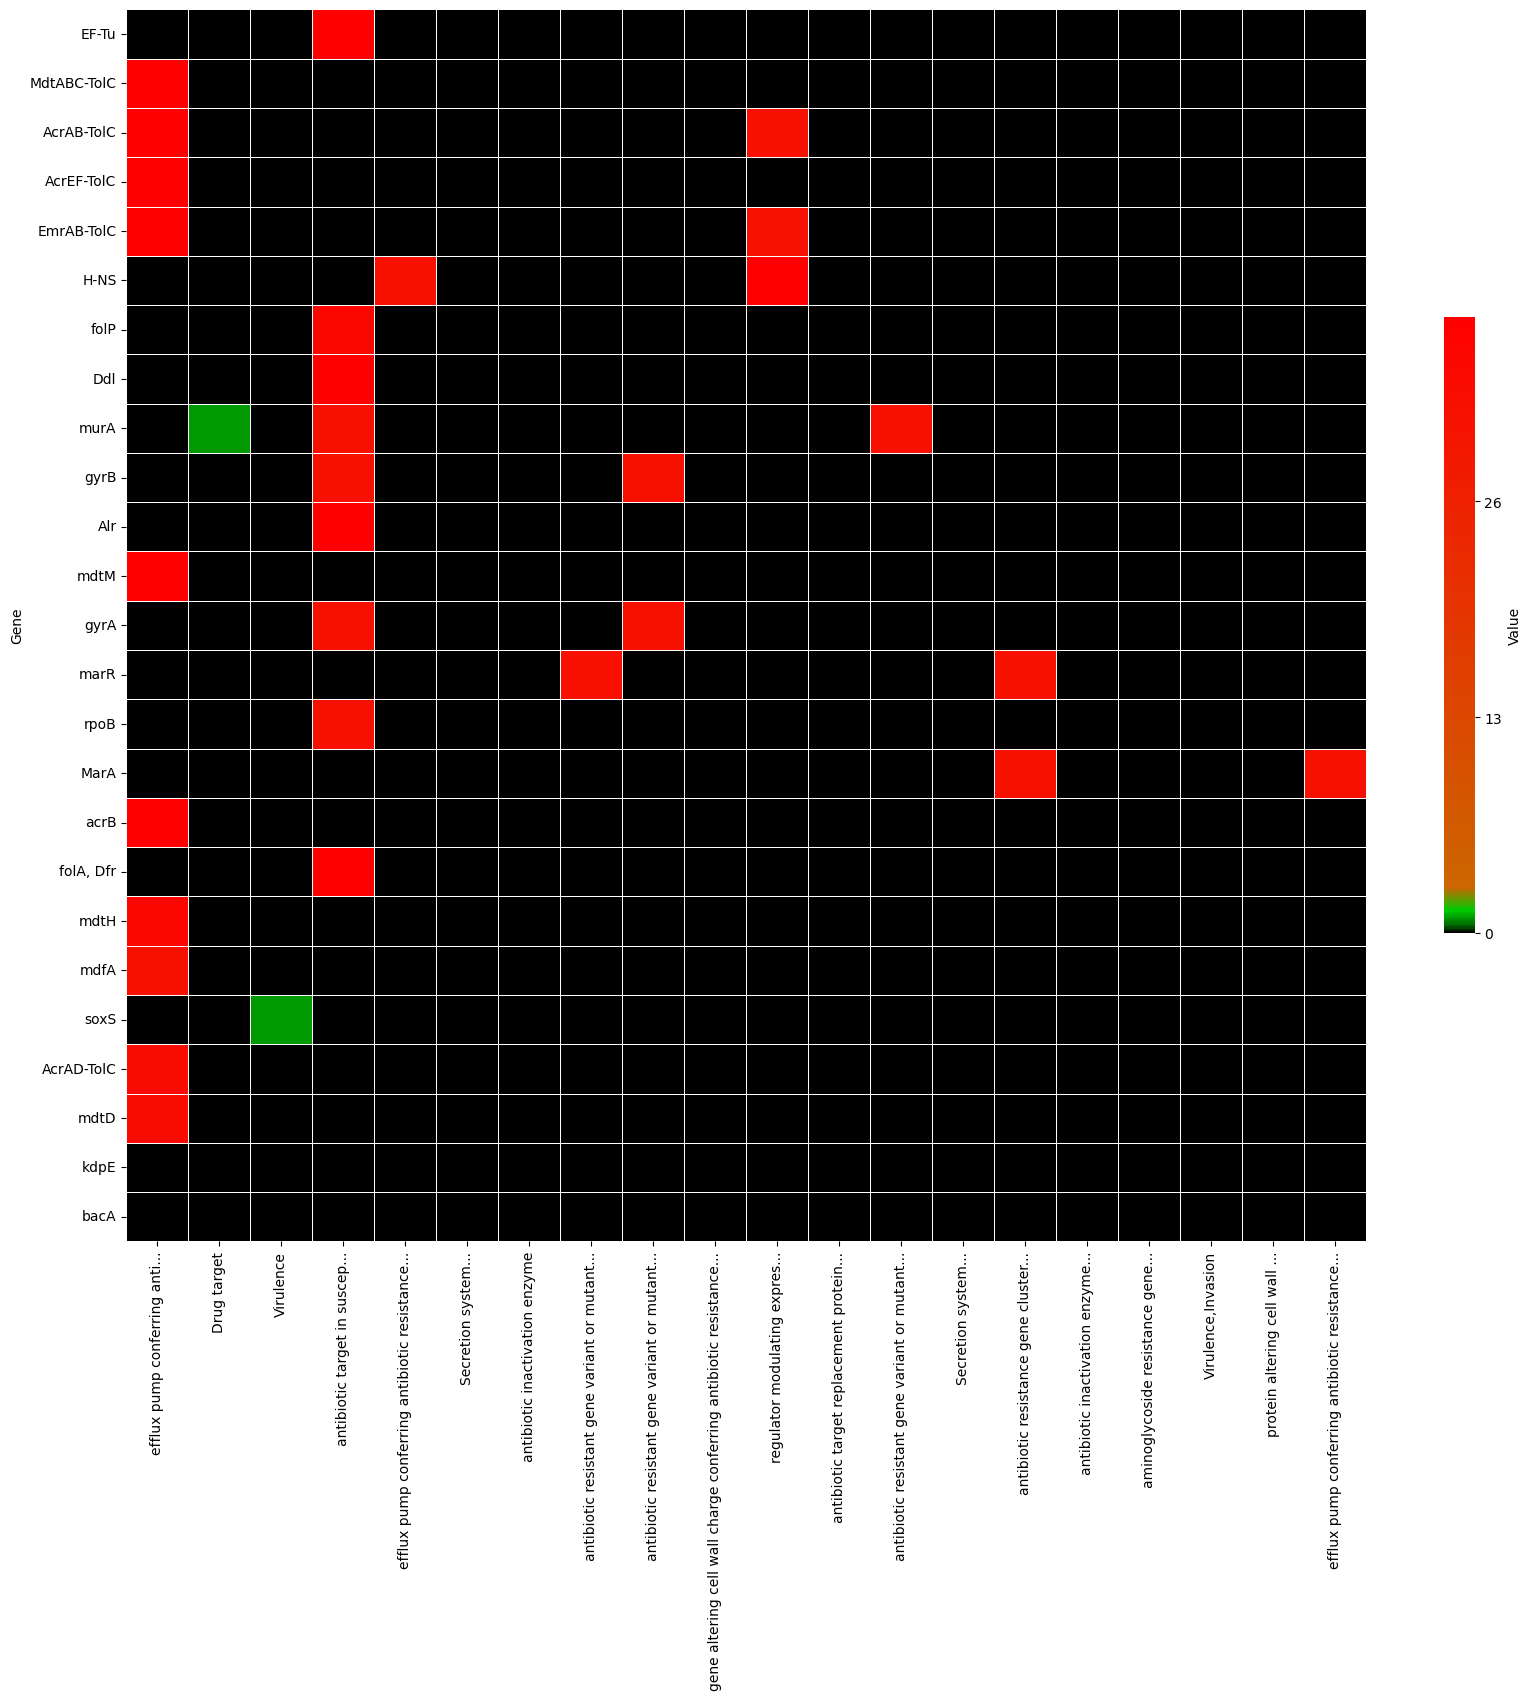

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import os

# Configuration parameters - adjust these as needed
NUM_TOP_GENES = 25       # Number of top genes to display
NUM_TOP_CATEGORIES = 20  # Number of top categories to display
MIDPOINT_VALUE = 5       # Value where color transitions from green to red
FIG_WIDTH = 20           # Figure width in inches
FIG_HEIGHT = 16          # Figure height in inches
SAVE_DPI = 150           # DPI for saved image
OUTPUT_FILE = "Gene_Classification_Advanced_Heatmap.png"

# Read the data
print("Loading data...")
data = pd.read_csv('Datasets/Gene-Classification.csv')
print(f"Original data shape: {data.shape}")

# Fix column names - some may have quotes or other issues
data.columns = [col.strip('"') for col in data.columns]

# Set 'Gene' as the index
data = data.set_index('Gene')

# Convert all data to numeric, errors become NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Fill NaN values with 0 to ensure proper processing
data = data.fillna(0)

# Calculate row sums for sorting and top genes selection
print("Processing data for visualization...")
data['row_sum'] = data.sum(axis=1)
data = data.sort_values('row_sum', ascending=False)
top_genes = data.head(NUM_TOP_GENES).index.tolist()

# Drop the temporary sum column
data = data.drop(columns=['row_sum'])

# Identify columns with non-zero values
nonzero_counts = (data != 0).sum()
active_cols = nonzero_counts[nonzero_counts > 0].sort_values(ascending=False)

# Select top categories for visualization
top_categories = active_cols.head(NUM_TOP_CATEGORIES).index.tolist()

# Create a subset for visualization
subset_data = data.loc[top_genes, top_categories]

# Function to shorten and clean column names for better display
def shorten_name(name, max_length=30):
    # Clean up any odd characters or formatting
    name = name.strip('"').strip()
    
    # If there are numbers with underscores (like _1, _2), remove them
    name = re.sub(r'_\d+', '', name) if '_' in name else name
    
    # If the name is too long, shorten it
    if len(name) > max_length:
        parts = name.split(',')
        if len(parts) > 1:
            # Keep the first part and indicate there's more
            return parts[0] + "..."
        # Just truncate with ellipsis
        return name[:max_length-3] + "..."
    return name

# Create a mapping dictionary for display names
col_display_names = {col: shorten_name(col) for col in top_categories}
subset_data = subset_data.rename(columns=col_display_names)

print(f"Data shape after preprocessing: {subset_data.shape}")
print("Sample of processed data:")
print(subset_data.head(3))

# Set up the figure
print("Creating heatmap...")
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))

# Create custom colormap: black -> green -> red
# Define the colormap based on the range of values in the data
vmin = subset_data.values.min()
vmax = subset_data.values.max() 
midpoint = MIDPOINT_VALUE  # Adjust this for color transition point

# Create a custom colormap with a better transition
colors = [
    (0, 0, 0),        # Black for 0
    (0, 0.4, 0),      # Dark green for low values
    (0, 0.8, 0),      # Bright green for medium values
    (0.8, 0.4, 0),    # Orange for higher values
    (1, 0, 0)         # Red for highest values
]
positions = [0, midpoint*0.3/vmax, midpoint/vmax, (midpoint*2)/vmax, 1]
custom_cmap = LinearSegmentedColormap.from_list('custom', list(zip(positions, colors)))

# Function to format annotations based on value
def fmt_func(val):
    if val == 0:
        return ""  # Don't show zeros in the heatmap
    return int(val) if val.is_integer() else f"{val:.1f}"

# Create the heatmap
heatmap = sns.heatmap(
    subset_data,
    cmap=custom_cmap,
    cbar=True,
    square=False,
    xticklabels=True,
    yticklabels=True,
    linewidths=0.5,
    linecolor='white',
    annot=True,      # Show the values
    fmt=fmt_func,    # Custom formatter for annotations
    robust=True,
    cbar_kws={
        "shrink": 0.5,
        "label": "Value",
        "ticks": np.arange(0, vmax+1, max(1, int(vmax/10)))
    }
)

# Adjust font sizes and labels
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=12)

# Add title and labels
plt.title("Gene Classification Heatmap", fontsize=24, pad=20)
plt.xlabel('Resistance Categories', fontsize=18, labelpad=20)
plt.ylabel('Genes', fontsize=18, labelpad=20)

# Add grid for better readability
for i in range(len(subset_data.index)):
    plt.axhline(y=i, color='white', linewidth=0.5)
for i in range(len(subset_data.columns)):
    plt.axvline(x=i, color='white', linewidth=0.5)

# Adjust layout
plt.tight_layout()

# Save the figure
print(f"Saving heatmap to: {OUTPUT_FILE}")
plt.savefig(OUTPUT_FILE, dpi=SAVE_DPI, bbox_inches='tight')
print("Heatmap has been successfully created and saved.")

# Calculate and display some summary statistics
print("\nSummary Statistics:")
print(f"Number of genes displayed: {len(top_genes)}")
print(f"Number of categories displayed: {len(top_categories)}")
print(f"Maximum value in the data: {vmax}")
print(f"Total non-zero entries in the displayed heatmap: {(subset_data != 0).sum().sum()}")

# Display the plot
plt.show()

Loading data...
Original data shape: (223, 34)
Processing data for visualization...
Data shape after preprocessing: (25, 33)
Sample of processed data:
             ST1  ST2  ST3  ST4  ST5  ST6  ST7  ST8  ST9  ST10  ...  ST24  \
Gene                                                            ...         
EF-Tu          5    5    5    2    5    2    5    5    5     5  ...     2   
MdtABC-TolC    3    3    3    3    3    3    3    3    3     3  ...     3   
AcrEF-TolC     3    3    3    3    3    3    3    3    3     3  ...     3   

             ST25  ST26  ST27  ST28  ST29  ST30  ST31  ST32  ST33  
Gene                                                               
EF-Tu           4     5     5     5     5     2     2     5     2  
MdtABC-TolC     3     3     3     3     3     3     3     3     3  
AcrEF-TolC      3     3     3     3     3     3     3     3     3  

[3 rows x 33 columns]
Creating heatmap...
Saving heatmap to: Gene_SampleID_Heatmap.png
Heatmap has been successfully creat

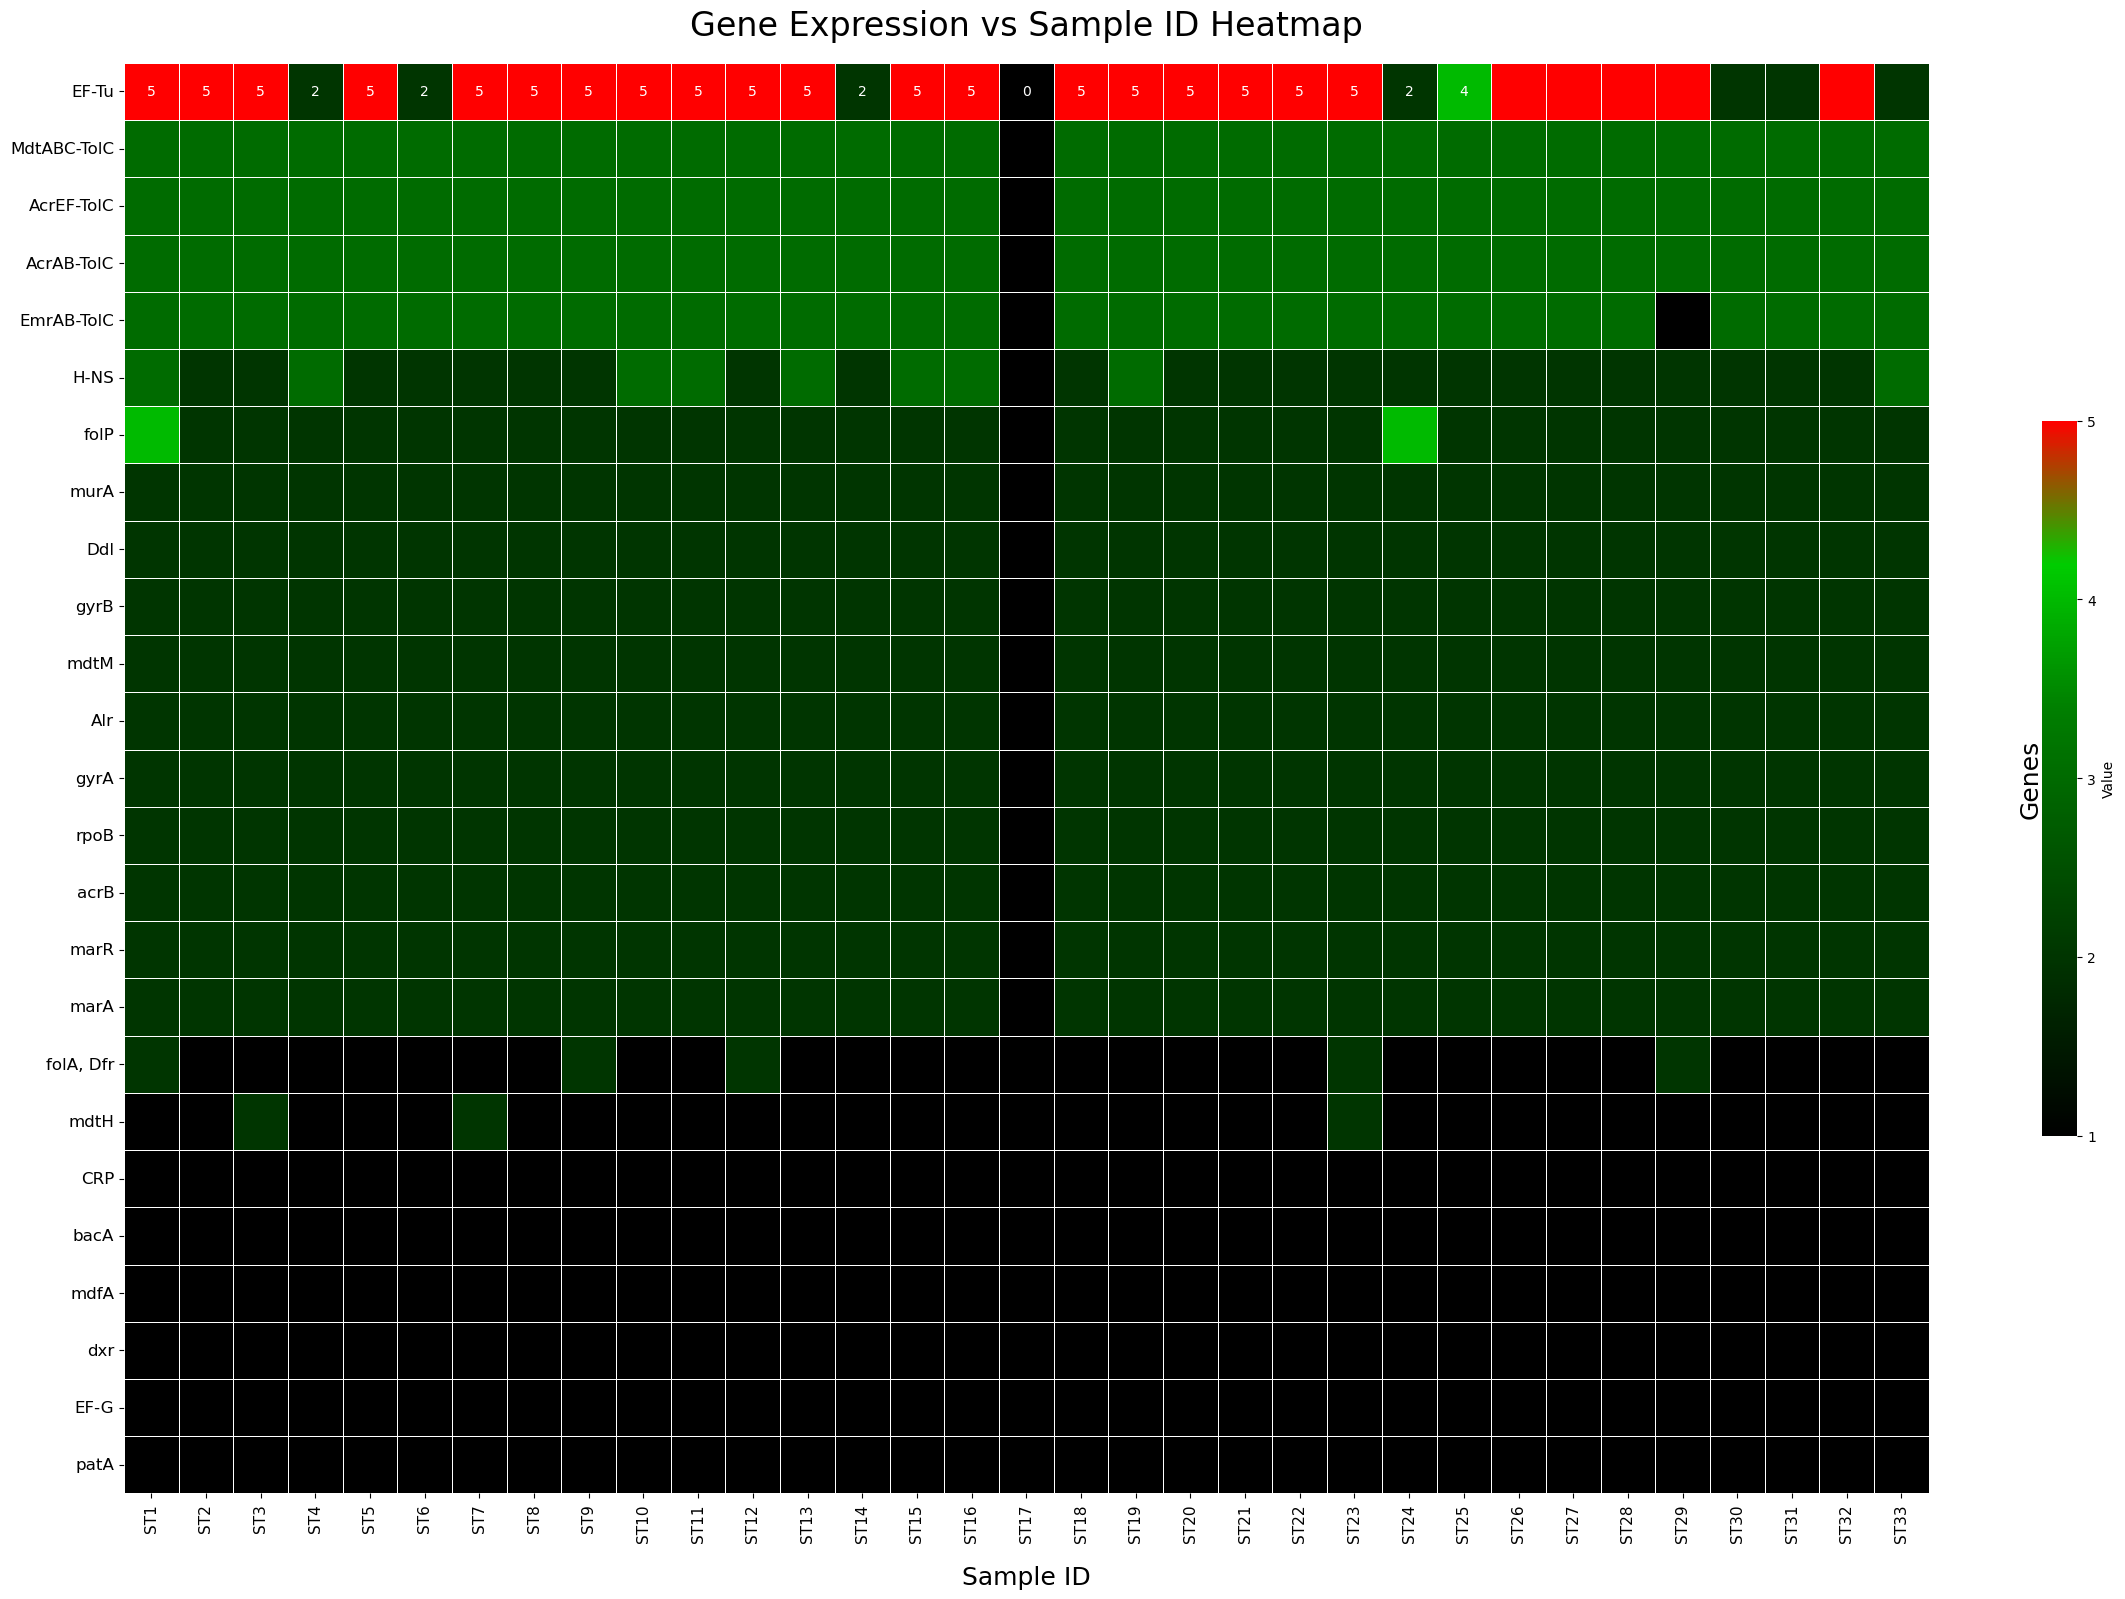

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import os

# Configuration parameters - adjust as needed
NUM_TOP_GENES = 25       # Number of top genes to display
FIG_WIDTH = 24           # Figure width in inches
FIG_HEIGHT = 16          # Figure height in inches
OUTPUT_FILE = "Gene_SampleID_Heatmap.png"

# Read the data
print("Loading data...")
data = pd.read_csv('Datasets/Gene-SampleID.csv')
print(f"Original data shape: {data.shape}")

# Set 'Gene' as the index
data = data.set_index('Gene')

# Convert all data to numeric, errors become NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Fill NaN values with 0 to ensure proper processing
data = data.fillna(0)

# Calculate row sums for sorting and select top genes by activity
print("Processing data for visualization...")
data['row_sum'] = data.sum(axis=1)
data = data.sort_values('row_sum', ascending=False)
top_genes = data.head(NUM_TOP_GENES).index.tolist()

# Drop the temporary sum column
data = data.drop(columns=['row_sum'])

# Create a subset with top genes for visualization
subset_data = data.loc[top_genes]

print(f"Data shape after preprocessing: {subset_data.shape}")
print("Sample of processed data:")
print(subset_data.head(3))

# Set up the figure
print("Creating heatmap...")
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))

# Create custom colormap: black -> green -> red
# Define the colormap based on the range of values in the data
vmin = subset_data.values.min()
vmax = subset_data.values.max()
midpoint = 3  # Midpoint for color transition

# Create the custom colormap (similar to the example)
colors = [(0, 0, 0), (0, 0.5, 0), (0, 0.8, 0), (1, 0, 0)]  # Black -> Green -> Bright Green -> Red
positions = [0, midpoint/vmax, (midpoint+1)/vmax, 1]
custom_cmap = LinearSegmentedColormap.from_list('custom', list(zip(positions, colors)))

# Function to format annotations based on value
def fmt_func(val):
    if val == 0:
        return ""  # Don't show zeros in the heatmap
    return int(val) if val.is_integer() else f"{val:.1f}"

# Create the heatmap
heatmap = sns.heatmap(
    subset_data,
    cmap=custom_cmap,
    cbar=True,
    square=False,
    xticklabels=True,
    yticklabels=True,
    linewidths=0.5,
    linecolor='white',
    annot=True,      # Show the values
    fmt=".0f",       # Format as integers
    center=None,
    robust=True,
    cbar_kws={
        "shrink": 0.5,
        "label": "Value",
        "ticks": np.arange(vmin, vmax+1, 1)  # Integer ticks for this dataset
    }
)

# Adjust font sizes
plt.xticks(fontsize=11, rotation=90)
plt.yticks(fontsize=12)

# Add title and labels
plt.title("Gene Expression vs Sample ID Heatmap", fontsize=24, pad=20)
plt.xlabel('Sample ID', fontsize=18, labelpad=20)
plt.ylabel('Genes', fontsize=18, labelpad=20)

# Position labels - x-axis centered, y-axis on the right (similar to example)
plt.gca().xaxis.set_label_coords(0.5, -0.05)  # Horizontal center, a bit below the axis
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.set_label_coords(1.05, 0.5)   # To the right of the axis, vertical center

# Add grid for better readability
for i in range(len(subset_data.index)):
    plt.axhline(y=i, color='white', linewidth=0.5)
for i in range(len(subset_data.columns)):
    plt.axvline(x=i, color='white', linewidth=0.5)

# Set tight layout for better display
plt.tight_layout()

# Save the figure
print(f"Saving heatmap to: {OUTPUT_FILE}")
plt.savefig(OUTPUT_FILE, dpi=150, bbox_inches='tight')
print("Heatmap has been successfully created and saved.")

# Calculate and display some summary statistics
print("\nSummary Statistics:")
print(f"Number of genes displayed: {len(top_genes)}")
print(f"Number of samples: {len(subset_data.columns)}")
print(f"Value range: {vmin}-{vmax}")
print(f"Total non-zero entries in the displayed heatmap: {(subset_data != 0).sum().sum()}")
print(f"Percentage filled: {(subset_data != 0).sum().sum() / (len(top_genes) * len(subset_data.columns)) * 100:.1f}%")

# Display the plot
plt.show()